In [1]:
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint
import csv
from datetime import datetime, timedelta
from pandas_datareader import data,wb
from datetime import date
from dateutil.rrule import rrule, DAILY
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
from matplotlib import interactive


In [2]:
#importing companies
csvfile="SP_100_Tickers.csv"
stocks=pd.read_csv(csvfile)
stocks

ticker=list(stocks.Symbol)


In [3]:
#setting up API
url='https://api.iextrading.com/1.0'
sector=[]
name=[]
industry=[]
symbol=[]

In [4]:
#LOOPING FOR EACH STOCK IN THE LIST
for tic in ticker:
    url='https://api.iextrading.com/1.0/stock/'+tic+'/company'
#    query_url=url+tic
    stock_response=requests.get(url)
    stock_json=stock_response.json()
    #json.load(stock_response)
    #print(json.dumps(stock_json,sort_keys=True, indent=4))
    sector.append(stock_json["sector"])
    name.append(stock_json['companyName'])
    industry.append(stock_json['industry'])
    symbol.append(stock_json['symbol'])
stock_df=pd.DataFrame({'sector':sector,'Company':name,'industry':industry, 'ticker':symbol})
    
    
    #if ('sector' in stock_json):
        #sector=stock_json['sector']
        #print(tic
             #)
    #else:
        #print('nada')
    #print(url)
    #print(stock_json)
    

In [5]:
stock_df

Company  \
0                                   Apple Inc.   
1                                  AbbVie Inc.   
2                          Abbott Laboratories   
3              Accenture plc Class A (Ireland)   
4                                 Allergan plc   
5            American International Group Inc.   
6                   Allstate Corporation (The)   
7                                   Amgen Inc.   
8                              Amazon.com Inc.   
9                     American Express Company   
10                          The Boeing Company   
11                 Bank of America Corporation   
12                                 Biogen Inc.   
13   Bank of New York Mellon Corporation (The)   
14                       Booking Holdings Inc.   
15                              BlackRock Inc.   
16                Bristol-Myers Squibb Company   
17                     Berkshire Hathaway Inc.   
18                              Citigroup Inc.   
19                            Caterpillar Inc.   
20                         Celgene Corporation   
21                 Charter Communications Inc.   
22                   Colgate-Palmolive Company   
23    Comcast Corporation Class A Common Stock   
24           Capital One Financial Corporation   
25                              ConocoPhillips   
26                Costco Wholesale Corporation   
27                          Cisco Systems Inc.   
28                      CVS Health Corporation   
29                         Chevron Corporation   
..                                         ...   
72                                Netflix Inc.   
73                                   Nike Inc.   
74                          NVIDIA Corporation   
75                          Oracle Corporation   
76            Occidental Petroleum Corporation   
77                                PepsiCo Inc.   
78                                 Pfizer Inc.   
79              Procter & Gamble Company (The)   
80             Philip Morris International Inc   
81                        PayPal Holdings Inc.   
82                       QUALCOMM Incorporated   
83                            Raytheon Company   
84                       Starbucks Corporation   
85                           Schlumberger N.V.   
86                      Southern Company (The)   
87                   Simon Property Group Inc.   
88                                   AT&T Inc.   
89                          Target Corporation   
90              Texas Instruments Incorporated   
91        UnitedHealth Group Incorporated (DE)   
92                   Union Pacific Corporation   
93                  United Parcel Service Inc.   
94                                U.S. Bancorp   
95             United Technologies Corporation   
96                                   Visa Inc.   
97                 Verizon Communications Inc.   
98               Walgreens Boots Alliance Inc.   
99                       Wells Fargo & Company   
100                               Walmart Inc.   
101                    Exxon Mobil Corporation   

                                industry                  sector ticker  
0                      Computer Hardware              Technology   AAPL  
1                     Drug Manufacturers              Healthcare   ABBV  
2                        Medical Devices              Healthcare    ABT  
3                   Application Software              Technology    ACN  
4                     Drug Manufacturers              Healthcare    AGN  
5                              Insurance      Financial Services    AIG  
6        Insurance - Property & Casualty      Financial Services    ALL  
7                          Biotechnology              Healthcare   AMGN  
8           Retail - Apparel & Specialty       Consumer Cyclical   AMZN  
9                        Credit Services      Financial Services    AXP  
10                   Aerospace & Defense             Industrials     BA  
11                                 Banks      Fina

In [6]:
start=datetime(2018,1,2)
end=datetime.today()

In [7]:
#sector.append(stock_json["sector"])
#name.append(stock_json['companyName'])
#industry.append(stock_json['industry'])



date=[]
high=[]
low=[]
percent_change=[]
stock_open=[]
stock_close=[]
tic_list=[]
volume=[]
x=0

#stock_performance_df=pd.DataFrame()

#LOOPING FOR EACH COMPANY
for tic in ticker:
    
    url2='https://api.iextrading.com/1.0/stock/'+tic+'/chart/ytd'
    stock_performance_response=requests.get(url2)
    stock_performance_json=stock_performance_response.json()
    #print(json.dumps(stock_performance_json,sort_keys=True, indent=4))
    #dates=stock_performance_json.DataReader(start,end)
    
    #SETTING A LOOP TO BREAK INFORMATION DOWN MY EACH DAY YTD
    for day in stock_performance_json:
        print('-------------')
        print(day)
        print('-------------')
        
        
        
        date.append(day["date"])
        high.append(day["high"])
        low.append(day["low"])
        percent_change.append(day["changePercent"])
        stock_open.append(day["open"])
        stock_close.append(day["close"])
        volume.append(day["volume"])
        tic_list.append(tic)
    

-------------
{'date': '2018-01-02', 'open': 168.228, 'high': 170.3437, 'low': 167.3382, 'close': 170.3042, 'volume': 25555934, 'unadjustedVolume': 25555934, 'change': 2.9956, 'changePercent': 1.79, 'vwap': 169.3667, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 170.5711, 'high': 172.5682, 'low': 170.0076, 'close': 170.2745, 'volume': 29517899, 'unadjustedVolume': 29517899, 'change': -0.029659, 'changePercent': -0.017, 'vwap': 171.1486, 'label': 'Jan 3, 18', 'changeOverTime': -0.0001743938199998567}
-------------
-------------
{'date': '2018-01-04', 'open': 170.581, 'high': 171.5005, 'low': 170.1262, 'close': 171.0654, 'volume': 22434597, 'unadjustedVolume': 22434597, 'change': 0.790917, 'changePercent': 0.464, 'vwap': 171.0075, 'label': 'Jan 4, 18', 'changeOverTime': 0.004469649016289688}
-------------
-------------
{'date': '2018-01-05', 'open': 171.4708, 'high': 173.3789, 'low': 171.0852, 'close': 173.0131, 'volume': 23660018, 

-------------
{'date': '2018-01-02', 'open': 94.4943, 'high': 96.2064, 'low': 94.1149, 'close': 95.7297, 'volume': 4561295, 'unadjustedVolume': 4561295, 'change': 1.6537, 'changePercent': 1.758, 'vwap': 95.4571, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 95.8659, 'high': 97.3737, 'low': 95.3698, 'close': 97.2278, 'volume': 4702328, 'unadjustedVolume': 4702328, 'change': 1.4981, 'changePercent': 1.565, 'vwap': 96.8022, 'label': 'Jan 3, 18', 'changeOverTime': 0.01564927081146194}
-------------
-------------
{'date': '2018-01-04', 'open': 97.3445, 'high': 97.3931, 'low': 95.6713, 'close': 96.6733, 'volume': 3578996, 'unadjustedVolume': 3578996, 'change': -0.554475, 'changePercent': -0.57, 'vwap': 96.6496, 'label': 'Jan 4, 18', 'changeOverTime': 0.009856920057202765}
-------------
-------------
{'date': '2018-01-05', 'open': 96.6344, 'high': 98.4437, 'low': 95.8756, 'close': 98.3562, 'volume': 4599309, 'unadjustedVolume': 4599309, 

-------------
{'date': '2018-01-02', 'open': 57.3876, 'high': 58.3737, 'low': 57.01, 'close': 57.9694, 'volume': 10113305, 'unadjustedVolume': 10113305, 'change': 1.696, 'changePercent': 3.014, 'vwap': 57.9403, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 58.1666, 'high': 58.1912, 'low': 57.4961, 'close': 58.0976, 'volume': 5684407, 'unadjustedVolume': 5684407, 'change': 0.128186, 'changePercent': 0.221, 'vwap': 57.9855, 'label': 'Jan 3, 18', 'changeOverTime': 0.0022115115905977922}
-------------
-------------
{'date': '2018-01-04', 'open': 58.6695, 'high': 58.7681, 'low': 57.9398, 'close': 57.999, 'volume': 6239956, 'unadjustedVolume': 6239956, 'change': -0.098604, 'changePercent': -0.17, 'vwap': 58.1621, 'label': 'Jan 4, 18', 'changeOverTime': 0.0005106142206060796}
-------------
-------------
{'date': '2018-01-05', 'open': 58.2159, 'high': 58.2652, 'low': 57.8165, 'close': 58.1666, 'volume': 5836945, 'unadjustedVolume': 583694

-------------
{'date': '2018-01-02', 'open': 152.1573, 'high': 152.7521, 'low': 151.4436, 'close': 152.4944, 'volume': 3061912, 'unadjustedVolume': 3061912, 'change': 0.74344, 'changePercent': 0.49, 'vwap': 152.2226, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.6468, 'high': 153.6343, 'low': 151.6468, 'close': 153.1982, 'volume': 2064185, 'unadjustedVolume': 2064185, 'change': 0.703789, 'changePercent': 0.462, 'vwap': 153.1523, 'label': 'Jan 3, 18', 'changeOverTime': 0.004615251445298982}
-------------
-------------
{'date': '2018-01-04', 'open': 153.6442, 'high': 155.4879, 'low': 153.4162, 'close': 155.0121, 'volume': 1777024, 'unadjustedVolume': 1777024, 'change': 1.814, 'changePercent': 1.184, 'vwap': 154.8038, 'label': 'Jan 4, 18', 'changeOverTime': 0.01651011446977719}
-------------
-------------
{'date': '2018-01-05', 'open': 155.2401, 'high': 156.3404, 'low': 154.7643, 'close': 156.2909, 'volume': 1597608, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 161.9453, 'high': 168.9246, 'low': 161.3628, 'close': 168.1348, 'volume': 3161623, 'unadjustedVolume': 3161623, 'change': 6.6535, 'changePercent': 4.12, 'vwap': 166.535, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 169.7933, 'high': 170.2572, 'low': 166.6541, 'close': 167.9571, 'volume': 2609163, 'unadjustedVolume': 2609163, 'change': -0.17769, 'changePercent': -0.106, 'vwap': 168.3078, 'label': 'Jan 3, 18', 'changeOverTime': -0.001056890066779844}
-------------
-------------
{'date': '2018-01-04', 'open': 169.0035, 'high': 169.7735, 'low': 166.6837, 'close': 169.3786, 'volume': 1742685, 'unadjustedVolume': 1742685, 'change': 1.4215, 'changePercent': 0.846, 'vwap': 168.519, 'label': 'Jan 4, 18', 'changeOverTime': 0.007397635706587768}
-------------
-------------
{'date': '2018-01-05', 'open': 170.2177, 'high': 170.6027, 'low': 168.8061, 'close': 170.0795, 'volume': 1749573, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 59.3069, 'high': 59.3069, 'low': 58.4371, 'close': 58.8127, 'volume': 3769607, 'unadjustedVolume': 3769607, 'change': -0.079075, 'changePercent': -0.134, 'vwap': 58.8003, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 58.6941, 'high': 59.5837, 'low': 58.5853, 'close': 59.4651, 'volume': 4959322, 'unadjustedVolume': 4959322, 'change': 0.652376, 'changePercent': 1.109, 'vwap': 59.3564, 'label': 'Jan 3, 18', 'changeOverTime': 0.011092842192247595}
-------------
-------------
{'date': '2018-01-04', 'open': 59.7221, 'high': 60.3448, 'low': 59.5837, 'close': 59.7023, 'volume': 4170571, 'unadjustedVolume': 4170571, 'change': 0.237227, 'changePercent': 0.399, 'vwap': 59.8888, 'label': 'Jan 4, 18', 'changeOverTime': 0.01512598469378215}
-------------
-------------
{'date': '2018-01-05', 'open': 59.9395, 'high': 60.0878, 'low': 59.6726, 'close': 59.9494, 'volume': 3726098, 'unadjustedVolume': 3726

-------------
{'date': '2018-01-02', 'open': 103.0445, 'high': 103.4901, 'low': 100.6781, 'close': 100.9157, 'volume': 4788853, 'unadjustedVolume': 4788853, 'change': -2.7625, 'changePercent': -2.665, 'vwap': 101.3842, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 100.9157, 'high': 101.7276, 'low': 100.6484, 'close': 100.9751, 'volume': 1993808, 'unadjustedVolume': 1993808, 'change': 0.059409, 'changePercent': 0.059, 'vwap': 100.9636, 'label': 'Jan 3, 18', 'changeOverTime': 0.0005886100973386358}
-------------
-------------
{'date': '2018-01-04', 'open': 101.2524, 'high': 101.7177, 'low': 99.6978, 'close': 99.8068, 'volume': 2017441, 'unadjustedVolume': 2017441, 'change': -1.1684, 'changePercent': -1.157, 'vwap': 100.2516, 'label': 'Jan 4, 18', 'changeOverTime': -0.01098837940974502}
-------------
-------------
{'date': '2018-01-05', 'open': 100.2424, 'high': 100.9256, 'low': 99.2325, 'close': 100.8662, 'volume': 1587969, 'unadjus

-------------
{'date': '2018-01-02', 'open': 171.534, 'high': 173.9458, 'low': 170.6242, 'close': 173.1481, 'volume': 2301141, 'unadjustedVolume': 2301141, 'change': 3.0325, 'changePercent': 1.783, 'vwap': 172.9692, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 173.06, 'high': 177.4919, 'low': 171.935, 'close': 176.4154, 'volume': 3083966, 'unadjustedVolume': 3083966, 'change': 3.2673, 'changePercent': 1.887, 'vwap': 175.9026, 'label': 'Jan 3, 18', 'changeOverTime': 0.0188699731617038}
-------------
-------------
{'date': '2018-01-04', 'open': 176.6991, 'high': 176.924, 'low': 174.86, 'close': 175.6719, 'volume': 2021054, 'unadjustedVolume': 2021054, 'change': -0.743461, 'changePercent': -0.421, 'vwap': 175.79, 'label': 'Jan 4, 18', 'changeOverTime': 0.014575961272459786}
-------------
-------------
{'date': '2018-01-05', 'open': 176.9045, 'high': 176.9436, 'low': 175.1339, 'close': 176.7186, 'volume': 2211382, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 1172, 'high': 1190, 'low': 1170.51, 'close': 1189.01, 'volume': 2694494, 'unadjustedVolume': 2694494, 'change': 19.54, 'changePercent': 1.671, 'vwap': 1184.27, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1188.3, 'high': 1205.49, 'low': 1188.3, 'close': 1204.2, 'volume': 3108793, 'unadjustedVolume': 3108793, 'change': 15.19, 'changePercent': 1.278, 'vwap': 1199.91, 'label': 'Jan 3, 18', 'changeOverTime': 0.012775334101479428}
-------------
-------------
{'date': '2018-01-04', 'open': 1205, 'high': 1215.87, 'low': 1204.66, 'close': 1209.59, 'volume': 3022089, 'unadjustedVolume': 3022089, 'change': 5.39, 'changePercent': 0.448, 'vwap': 1210.12, 'label': 'Jan 4, 18', 'changeOverTime': 0.0173085171697462}
-------------
-------------
{'date': '2018-01-05', 'open': 1217.51, 'high': 1229.14, 'low': 1210, 'close': 1229.14, 'volume': 3544743, 'unadjustedVolume': 3544743, 'change': 19.55, 'chang

-------------
{'date': '2018-01-02', 'open': 98.6535, 'high': 98.6535, 'low': 97.1598, 'close': 97.872, 'volume': 2746672, 'unadjustedVolume': 2746672, 'change': -0.366007, 'changePercent': -0.373, 'vwap': 97.7797, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 98.1688, 'high': 98.6832, 'low': 97.9512, 'close': 98.4755, 'volume': 2976441, 'unadjustedVolume': 2976441, 'change': 0.603416, 'changePercent': 0.617, 'vwap': 98.2754, 'label': 'Jan 3, 18', 'changeOverTime': 0.006166217099885532}
-------------
-------------
{'date': '2018-01-04', 'open': 99.2994, 'high': 100.9076, 'low': 99.1803, 'close': 100.1134, 'volume': 3122034, 'unadjustedVolume': 3122034, 'change': 1.638, 'changePercent': 1.663, 'vwap': 100.2595, 'label': 'Jan 4, 18', 'changeOverTime': 0.022901340526401817}
-------------
-------------
{'date': '2018-01-05', 'open': 100.1134, 'high': 100.3418, 'low': 99.5377, 'close': 100.3418, 'volume': 2550286, 'unadjustedVolume': 2

-------------
{'date': '2018-01-02', 'open': 291.3965, 'high': 292.6183, 'low': 291.0477, 'close': 292.4705, 'volume': 2978918, 'unadjustedVolume': 2978918, 'change': 1.9016, 'changePercent': 0.654, 'vwap': 291.7886, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 291.5837, 'high': 294.106, 'low': 291.1206, 'close': 293.4163, 'volume': 3211195, 'unadjustedVolume': 3211195, 'change': 0.945868, 'changePercent': 0.323, 'vwap': 292.4095, 'label': 'Jan 3, 18', 'changeOverTime': 0.003233830420503821}
-------------
-------------
{'date': '2018-01-04', 'open': 293.5543, 'high': 294.0272, 'low': 291.1206, 'close': 292.303, 'volume': 4171720, 'unadjustedVolume': 4171720, 'change': -1.1134, 'changePercent': -0.379, 'vwap': 292.2951, 'label': 'Jan 4, 18', 'changeOverTime': -0.0005727073328763694}
-------------
-------------
{'date': '2018-01-05', 'open': 292.4015, 'high': 304.3431, 'low': 292.3522, 'close': 304.2938, 'volume': 6177731, 'unadjus

-------------
{'date': '2018-01-02', 'open': 29.5182, 'high': 29.667, 'low': 29.3793, 'close': 29.667, 'volume': 57121603, 'unadjustedVolume': 57121603, 'change': 0.37704, 'changePercent': 1.287, 'vwap': 29.5059, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 29.667, 'high': 29.7067, 'low': 29.4587, 'close': 29.5678, 'volume': 57865727, 'unadjustedVolume': 57865727, 'change': -0.099221, 'changePercent': -0.334, 'vwap': 29.5507, 'label': 'Jan 3, 18', 'changeOverTime': -0.0033437826541275924}
-------------
-------------
{'date': '2018-01-04', 'open': 29.7365, 'high': 30.2028, 'low': 29.6472, 'close': 29.9548, 'volume': 76512451, 'unadjustedVolume': 76512451, 'change': 0.386961, 'changePercent': 1.309, 'vwap': 29.9835, 'label': 'Jan 4, 18', 'changeOverTime': 0.009701014595341529}
-------------
-------------
{'date': '2018-01-05', 'open': 30.1334, 'high': 30.183, 'low': 29.8159, 'close': 30.0937, 'volume': 56445186, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 321.15, 'high': 335.43, 'low': 318.33, 'close': 334.17, 'volume': 1422514, 'unadjustedVolume': 1422514, 'change': 15.6, 'changePercent': 4.897, 'vwap': 330.797, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 333.46, 'high': 340.45, 'low': 332.71, 'close': 339.85, 'volume': 1121700, 'unadjustedVolume': 1121700, 'change': 5.68, 'changePercent': 1.7, 'vwap': 338.1876, 'label': 'Jan 3, 18', 'changeOverTime': 0.01699733668492087}
-------------
-------------
{'date': '2018-01-04', 'open': 339.73, 'high': 341.4, 'low': 335.46, 'close': 339.99, 'volume': 967081, 'unadjustedVolume': 967081, 'change': 0.14, 'changePercent': 0.041, 'vwap': 339.0957, 'label': 'Jan 4, 18', 'changeOverTime': 0.01741628512433789}
-------------
-------------
{'date': '2018-01-05', 'open': 342, 'high': 344.12, 'low': 339.06, 'close': 342.49, 'volume': 1486430, 'unadjustedVolume': 1486430, 'change': 2.5, 'changePercent': 

-------------
{'date': '2018-01-02', 'open': 53.528, 'high': 53.6563, 'low': 52.9461, 'close': 53.0842, 'volume': 3633056, 'unadjustedVolume': 3633056, 'change': -0.039453, 'changePercent': -0.074, 'vwap': 53.1663, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 53.1828, 'high': 53.5083, 'low': 52.9264, 'close': 53.4097, 'volume': 2409301, 'unadjustedVolume': 2409301, 'change': 0.325488, 'changePercent': 0.613, 'vwap': 53.3156, 'label': 'Jan 3, 18', 'changeOverTime': 0.006131768021369788}
-------------
-------------
{'date': '2018-01-04', 'open': 53.6267, 'high': 54.2974, 'low': 53.5182, 'close': 53.9423, 'volume': 2886534, 'unadjustedVolume': 2886534, 'change': 0.532617, 'changePercent': 0.997, 'vwap': 54.0457, 'label': 'Jan 4, 18', 'changeOverTime': 0.016164885220084323}
-------------
-------------
{'date': '2018-01-05', 'open': 54.1001, 'high': 54.1692, 'low': 53.6859, 'close': 54.0804, 'volume': 2514720, 'unadjustedVolume': 2514

-------------
{'date': '2018-01-02', 'open': 1750.09, 'high': 1790.66, 'low': 1744.5, 'close': 1784.75, 'volume': 475542, 'unadjustedVolume': 475542, 'change': 47.01, 'changePercent': 2.705, 'vwap': 1777.63, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1790.23, 'high': 1829.02, 'low': 1785, 'close': 1824.16, 'volume': 525606, 'unadjustedVolume': 525606, 'change': 39.41, 'changePercent': 2.208, 'vwap': 1820.92, 'label': 'Jan 3, 18', 'changeOverTime': 0.022081524022972452}
-------------
-------------
{'date': '2018-01-04', 'open': 1838.54, 'high': 1848.9, 'low': 1802.03, 'close': 1807.25, 'volume': 592572, 'unadjustedVolume': 592572, 'change': -16.91, 'changePercent': -0.927, 'vwap': 1819.42, 'label': 'Jan 4, 18', 'changeOverTime': 0.012606807676145118}
-------------
-------------
{'date': '2018-01-05', 'open': 1820.18, 'high': 1825.5, 'low': 1805.8, 'close': 1823.54, 'volume': 358593, 'unadjustedVolume': 358593, 'change': 16.29, '

-------------
{'date': '2018-01-02', 'open': 513.2589, 'high': 513.2589, 'low': 501.0899, 'close': 503.5533, 'volume': 527135, 'unadjustedVolume': 527135, 'change': -4.6896, 'changePercent': -0.923, 'vwap': 504.6634, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 503.2466, 'high': 509.2619, 'low': 502.7519, 'close': 508.8661, 'volume': 448724, 'unadjustedVolume': 448724, 'change': 5.3128, 'changePercent': 1.055, 'vwap': 507.0088, 'label': 'Jan 3, 18', 'changeOverTime': 0.010550620957106306}
-------------
-------------
{'date': '2018-01-04', 'open': 511.0031, 'high': 515.7619, 'low': 509.529, 'close': 515.5839, 'volume': 389830, 'unadjustedVolume': 389830, 'change': 6.7177, 'changePercent': 1.32, 'vwap': 514.4745, 'label': 'Jan 4, 18', 'changeOverTime': 0.023891413282367515}
-------------
-------------
{'date': '2018-01-05', 'open': 518.2848, 'high': 520.3427, 'low': 515.3464, 'close': 519.9766, 'volume': 482968, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 60.1766, 'high': 60.2845, 'low': 59.6278, 'close': 60.0884, 'volume': 6472651, 'unadjustedVolume': 6472651, 'change': 0.029402, 'changePercent': 0.049, 'vwap': 59.9472, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 59.9904, 'high': 60.2796, 'low': 59.4906, 'close': 60.1374, 'volume': 7433967, 'unadjustedVolume': 7433967, 'change': 0.049003, 'changePercent': 0.082, 'vwap': 59.9972, 'label': 'Jan 3, 18', 'changeOverTime': 0.0008154652145838379}
-------------
-------------
{'date': '2018-01-04', 'open': 60.1769, 'high': 60.9858, 'low': 59.9599, 'close': 60.9168, 'volume': 6403211, 'unadjustedVolume': 6403211, 'change': 0.779347, 'changePercent': 1.296, 'vwap': 60.6708, 'label': 'Jan 4, 18', 'changeOverTime': 0.01378635477063796}
-------------
-------------
{'date': '2018-01-05', 'open': 61.0352, 'high': 61.3361, 'low': 60.6504, 'close': 61.0549, 'volume': 6113360, 'unadjustedVolume': 61133

-------------
{'date': '2018-01-02', 'open': 198.87, 'high': 198.87, 'low': 195.96, 'close': 197.22, 'volume': 4112983, 'unadjustedVolume': 4112983, 'change': -1, 'changePercent': -0.504, 'vwap': 197.219, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 197, 'high': 200, 'low': 197, 'close': 199.79, 'volume': 3526694, 'unadjustedVolume': 3526694, 'change': 2.57, 'changePercent': 1.303, 'vwap': 199.0311, 'label': 'Jan 3, 18', 'changeOverTime': 0.013031132745157657}
-------------
-------------
{'date': '2018-01-04', 'open': 200.9, 'high': 202.1299, 'low': 200.01, 'close': 200.69, 'volume': 3899998, 'unadjustedVolume': 3899998, 'change': 0.9, 'changePercent': 0.45, 'vwap': 201.2048, 'label': 'Jan 4, 18', 'changeOverTime': 0.017594564445796566}
-------------
-------------
{'date': '2018-01-05', 'open': 201, 'high': 201.67, 'low': 199.31, 'close': 201.42, 'volume': 4207636, 'unadjustedVolume': 4207636, 'change': 0.73, 'changePercent': 0.3

-------------
{'date': '2018-01-02', 'open': 73.9681, 'high': 74.0568, 'low': 72.9092, 'close': 73.249, 'volume': 15819844, 'unadjustedVolume': 15819844, 'change': -0.049253, 'changePercent': -0.067, 'vwap': 73.2611, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 73.2392, 'high': 73.619, 'low': 72.8649, 'close': 73.4756, 'volume': 14657944, 'unadjustedVolume': 14657944, 'change': 0.226563, 'changePercent': 0.309, 'vwap': 73.3387, 'label': 'Jan 3, 18', 'changeOverTime': 0.00309355759122998}
-------------
-------------
{'date': '2018-01-04', 'open': 73.8893, 'high': 74.9778, 'low': 73.5446, 'close': 74.3819, 'volume': 16864920, 'unadjustedVolume': 16864920, 'change': 0.906256, 'changePercent': 1.233, 'vwap': 74.5035, 'label': 'Jan 4, 18', 'changeOverTime': 0.015466422749798722}
-------------
-------------
{'date': '2018-01-05', 'open': 74.5789, 'high': 74.638, 'low': 73.8401, 'close': 74.2834, 'volume': 15300543, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 155.8238, 'high': 156.8968, 'low': 153.5893, 'close': 154.5835, 'volume': 5108362, 'unadjustedVolume': 5108362, 'change': -0.531554, 'changePercent': -0.343, 'vwap': 154.6865, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 154.5835, 'high': 155.0265, 'low': 152.9692, 'close': 154.8198, 'volume': 4146054, 'unadjustedVolume': 4146054, 'change': 0.236247, 'changePercent': 0.153, 'vwap': 154.2646, 'label': 'Jan 3, 18', 'changeOverTime': 0.0015286236888154296}
-------------
-------------
{'date': '2018-01-04', 'open': 155.4202, 'high': 157.0838, 'low': 154.5638, 'close': 156.946, 'volume': 4865769, 'unadjustedVolume': 4865769, 'change': 2.1262, 'changePercent': 1.373, 'vwap': 156.1518, 'label': 'Jan 4, 18', 'changeOverTime': 0.015283002390293994}
-------------
-------------
{'date': '2018-01-05', 'open': 157.7532, 'high': 159.5152, 'low': 157.1429, 'close': 159.4266, 'volume': 3945401, 'unadj

-------------
{'date': '2018-01-02', 'open': 105.29, 'high': 106.7, 'low': 104.58, 'close': 106.16, 'volume': 4742039, 'unadjustedVolume': 4742039, 'change': 1.8, 'changePercent': 1.725, 'vwap': 105.9683, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 106.22, 'high': 109.89, 'low': 105.82, 'close': 109.14, 'volume': 5451800, 'unadjustedVolume': 5451800, 'change': 2.98, 'changePercent': 2.807, 'vwap': 108.6224, 'label': 'Jan 3, 18', 'changeOverTime': 0.028070836473247967}
-------------
-------------
{'date': '2018-01-04', 'open': 109.95, 'high': 109.98, 'low': 106.565, 'close': 106.68, 'volume': 5929880, 'unadjustedVolume': 5929880, 'change': -2.46, 'changePercent': -2.254, 'vwap': 107.2204, 'label': 'Jan 4, 18', 'changeOverTime': 0.00489826676714403}
-------------
-------------
{'date': '2018-01-05', 'open': 106.01, 'high': 106.68, 'low': 104.05, 'close': 104.99, 'volume': 10586730, 'unadjustedVolume': 10586730, 'change': -1.69, 'c

-------------
{'date': '2018-01-02', 'open': 338.43, 'high': 352.82, 'low': 337.77, 'close': 348.97, 'volume': 2789254, 'unadjustedVolume': 2789254, 'change': 13.01, 'changePercent': 3.872, 'vwap': 347.8502, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 354.06, 'high': 364.38, 'low': 349.59, 'close': 353.03, 'volume': 2500770, 'unadjustedVolume': 2500770, 'change': 4.06, 'changePercent': 1.163, 'vwap': 353.3145, 'label': 'Jan 3, 18', 'changeOverTime': 0.011634237900105869}
-------------
-------------
{'date': '2018-01-04', 'open': 356.75, 'high': 358, 'low': 346.97, 'close': 349.79, 'volume': 1176448, 'unadjustedVolume': 1176448, 'change': -3.24, 'changePercent': -0.918, 'vwap': 350.0434, 'label': 'Jan 4, 18', 'changeOverTime': 0.0023497721867209017}
-------------
-------------
{'date': '2018-01-05', 'open': 352.02, 'high': 354.4, 'low': 349.08, 'close': 350.88, 'volume': 1960497, 'unadjustedVolume': 1960497, 'change': 1.09, 'chan

-------------
{'date': '2018-01-02', 'open': 74.126, 'high': 74.6861, 'low': 73.5462, 'close': 73.841, 'volume': 4352470, 'unadjustedVolume': 4352470, 'change': -0.304641, 'changePercent': -0.411, 'vwap': 73.9805, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 73.8115, 'high': 74.411, 'low': 73.3644, 'close': 73.556, 'volume': 3310214, 'unadjustedVolume': 3310214, 'change': -0.284987, 'changePercent': -0.386, 'vwap': 73.6447, 'label': 'Jan 3, 18', 'changeOverTime': -0.003859644371013348}
-------------
-------------
{'date': '2018-01-04', 'open': 73.7526, 'high': 74.6469, 'low': 73.6838, 'close': 74.0277, 'volume': 2501692, 'unadjustedVolume': 2501692, 'change': 0.471702, 'changePercent': 0.641, 'vwap': 74.2159, 'label': 'Jan 4, 18', 'changeOverTime': 0.0025284056283095013}
-------------
-------------
{'date': '2018-01-05', 'open': 74.1948, 'high': 74.2783, 'low': 73.841, 'close': 74.1162, 'volume': 2852827, 'unadjustedVolume': 2852

-------------
{'date': '2018-01-02', 'open': 39.9285, 'high': 40.6403, 'low': 39.5924, 'close': 40.6007, 'volume': 18270282, 'unadjustedVolume': 18270282, 'change': 1.1641, 'changePercent': 2.952, 'vwap': 40.428, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 40.2844, 'high': 40.8973, 'low': 39.5924, 'close': 39.9483, 'volume': 21062861, 'unadjustedVolume': 21062861, 'change': -0.652459, 'changePercent': -1.607, 'vwap': 40.0234, 'label': 'Jan 3, 18', 'changeOverTime': -0.016068688470888434}
-------------
-------------
{'date': '2018-01-04', 'open': 40.0076, 'high': 40.2547, 'low': 39.6418, 'close': 40.2053, 'volume': 18143793, 'unadjustedVolume': 18143793, 'change': 0.257029, 'changePercent': 0.643, 'vwap': 40.039, 'label': 'Jan 4, 18', 'changeOverTime': -0.009738748346703435}
-------------
-------------
{'date': '2018-01-05', 'open': 40.4426, 'high': 40.7688, 'low': 39.9483, 'close': 40.5711, 'volume': 17007527, 'unadjustedVolume'

-------------
{'date': '2018-01-02', 'open': 98.7995, 'high': 98.9179, 'low': 97.4964, 'close': 98.3355, 'volume': 1663682, 'unadjustedVolume': 1663682, 'change': 0.029616, 'changePercent': 0.03, 'vwap': 98.0279, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 98.2269, 'high': 98.5033, 'low': 97.4865, 'close': 98.1677, 'volume': 2323687, 'unadjustedVolume': 2323687, 'change': -0.167824, 'changePercent': -0.171, 'vwap': 98.0145, 'label': 'Jan 3, 18', 'changeOverTime': -0.0017064030792541833}
-------------
-------------
{'date': '2018-01-04', 'open': 99.0759, 'high': 100.8538, 'low': 98.4145, 'close': 100.1223, 'volume': 2149105, 'unadjustedVolume': 2149105, 'change': 1.9547, 'changePercent': 1.991, 'vwap': 100.1798, 'label': 'Jan 4, 18', 'changeOverTime': 0.018170447091843733}
-------------
-------------
{'date': '2018-01-05', 'open': 100.2803, 'high': 100.3987, 'low': 99.451, 'close': 100.1322, 'volume': 2058451, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 54.3467, 'high': 54.761, 'low': 54.0803, 'close': 54.5736, 'volume': 3985183, 'unadjustedVolume': 3985183, 'change': 0.424198, 'changePercent': 0.783, 'vwap': 54.492, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 54.6328, 'high': 55.6292, 'low': 54.5835, 'close': 55.5798, 'volume': 4105840, 'unadjustedVolume': 4105840, 'change': 1.0062, 'changePercent': 1.844, 'vwap': 55.3452, 'label': 'Jan 3, 18', 'changeOverTime': 0.018437486257091337}
-------------
-------------
{'date': '2018-01-04', 'open': 55.6489, 'high': 56.4137, 'low': 55.3332, 'close': 56.2211, 'volume': 4897240, 'unadjustedVolume': 4897240, 'change': 0.64123, 'changePercent': 1.154, 'vwap': 56.0975, 'label': 'Jan 4, 18', 'changeOverTime': 0.03018858935455973}
-------------
-------------
{'date': '2018-01-05', 'open': 55.9153, 'high': 56.1421, 'low': 55.422, 'close': 56.1126, 'volume': 3771851, 'unadjustedVolume': 3771851, 'ch

-------------
{'date': '2018-01-02', 'open': 186.1873, 'high': 189.6181, 'low': 185.7, 'close': 187.2712, 'volume': 2509344, 'unadjustedVolume': 2509344, 'change': 2.1877, 'changePercent': 1.182, 'vwap': 187.7793, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 187.7684, 'high': 191.0301, 'low': 187.3309, 'close': 189.5186, 'volume': 3364378, 'unadjustedVolume': 3364378, 'change': 2.2474, 'changePercent': 1.2, 'vwap': 189.6823, 'label': 'Jan 3, 18', 'changeOverTime': 0.012000777482068781}
-------------
-------------
{'date': '2018-01-04', 'open': 190.9307, 'high': 191.229, 'low': 186.5164, 'close': 188.0469, 'volume': 3525786, 'unadjustedVolume': 3525786, 'change': -1.4718, 'changePercent': -0.777, 'vwap': 188.0691, 'label': 'Jan 4, 18', 'changeOverTime': 0.0041421211590463485}
-------------
-------------
{'date': '2018-01-05', 'open': 188.375, 'high': 188.6236, 'low': 185.6801, 'close': 186.7044, 'volume': 2819026, 'unadjustedVolum

-------------
{'date': '2018-01-02', 'open': 37.7831, 'high': 38.0567, 'low': 37.5486, 'close': 37.9687, 'volume': 20135657, 'unadjustedVolume': 20135657, 'change': 0.547156, 'changePercent': 1.462, 'vwap': 37.849, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 37.8319, 'high': 38.384, 'low': 37.6463, 'close': 38.2716, 'volume': 29536019, 'unadjustedVolume': 29536019, 'change': 0.302889, 'changePercent': 0.798, 'vwap': 38.0814, 'label': 'Jan 3, 18', 'changeOverTime': 0.007977623674236966}
-------------
-------------
{'date': '2018-01-04', 'open': 38.439, 'high': 38.9213, 'low': 38.3209, 'close': 38.3799, 'volume': 20731358, 'unadjustedVolume': 20731358, 'change': 0.108294, 'changePercent': 0.283, 'vwap': 38.5315, 'label': 'Jan 4, 18', 'changeOverTime': 0.010829973109429633}
-------------
-------------
{'date': '2018-01-05', 'open': 38.9311, 'high': 39.256, 'low': 38.749, 'close': 38.9115, 'volume': 24588152, 'unadjustedVolume': 245

-------------
{'date': '2018-01-02', 'open': 71.5144, 'high': 72.4638, 'low': 71.3284, 'close': 71.9646, 'volume': 5878294, 'unadjustedVolume': 5878294, 'change': 0.99842, 'changePercent': 1.407, 'vwap': 71.9646, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.1702, 'high': 72.3366, 'low': 71.5144, 'close': 71.6514, 'volume': 6139515, 'unadjustedVolume': 6139515, 'change': -0.31323, 'changePercent': -0.435, 'vwap': 71.7869, 'label': 'Jan 3, 18', 'changeOverTime': -0.004352139802069476}
-------------
-------------
{'date': '2018-01-04', 'open': 73.5993, 'high': 75.048, 'low': 73.1001, 'close': 73.5406, 'volume': 13715528, 'unadjustedVolume': 13715528, 'change': 1.8892, 'changePercent': 2.637, 'vwap': 74.0316, 'label': 'Jan 4, 18', 'changeOverTime': 0.02189965621986356}
-------------
-------------
{'date': '2018-01-05', 'open': 74.6956, 'high': 76.8966, 'low': 74.5292, 'close': 76.7903, 'volume': 15338063, 'unadjustedVolume': 15338

-------------
{'date': '2018-01-02', 'open': 122.2231, 'high': 124.1968, 'low': 122.0578, 'close': 124.0412, 'volume': 5626785, 'unadjustedVolume': 5626785, 'change': 2.3237, 'changePercent': 1.909, 'vwap': 123.3491, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 123.9245, 'high': 125.3635, 'low': 123.3801, 'close': 124.9454, 'volume': 5805458, 'unadjustedVolume': 5805458, 'change': 0.904205, 'changePercent': 0.729, 'vwap': 124.6691, 'label': 'Jan 3, 18', 'changeOverTime': 0.007289513484229458}
-------------
-------------
{'date': '2018-01-04', 'open': 124.4009, 'high': 124.7898, 'low': 123.6912, 'close': 124.5565, 'volume': 4598264, 'unadjustedVolume': 4598264, 'change': -0.388905, 'changePercent': -0.311, 'vwap': 124.2639, 'label': 'Jan 4, 18', 'changeOverTime': 0.004154264873284008}
-------------
-------------
{'date': '2018-01-05', 'open': 124.4204, 'high': 124.5468, 'low': 123.5745, 'close': 124.3523, 'volume': 4189223, 'unadj

-------------
{'date': '2018-01-02', 'open': 92.8751, 'high': 93.1841, 'low': 91.8784, 'close': 92.1375, 'volume': 3623822, 'unadjustedVolume': 3623822, 'change': -0.378756, 'changePercent': -0.409, 'vwap': 92.4417, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 91.9382, 'high': 93.6027, 'low': 91.9132, 'close': 93.3635, 'volume': 2474514, 'unadjustedVolume': 2474514, 'change': 1.226, 'changePercent': 1.331, 'vwap': 93.0183, 'label': 'Jan 3, 18', 'changeOverTime': 0.013306199972866629}
-------------
-------------
{'date': '2018-01-04', 'open': 93.812, 'high': 94.5994, 'low': 93.7123, 'close': 93.812, 'volume': 2125204, 'unadjustedVolume': 2125204, 'change': 0.448528, 'changePercent': 0.48, 'vwap': 94.1143, 'label': 'Jan 4, 18', 'changeOverTime': 0.01817392484059145}
-------------
-------------
{'date': '2018-01-05', 'open': 94.2007, 'high': 94.6792, 'low': 94.0313, 'close': 94.4001, 'volume': 1880693, 'unadjustedVolume': 1880693, '

-------------
{'date': '2018-01-02', 'open': 108.0812, 'high': 110.9184, 'low': 107.6943, 'close': 110.9085, 'volume': 11014303, 'unadjustedVolume': 11014303, 'change': 4.2558, 'changePercent': 3.99, 'vwap': 109.7881, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 111.2954, 'high': 112.2874, 'low': 110.5613, 'close': 111.3847, 'volume': 9237926, 'unadjustedVolume': 9237926, 'change': 0.476172, 'changePercent': 0.429, 'vwap': 111.4182, 'label': 'Jan 3, 18', 'changeOverTime': 0.004293629433271494}
-------------
-------------
{'date': '2018-01-04', 'open': 112.0493, 'high': 112.0989, 'low': 110.7399, 'close': 111.3351, 'volume': 7417409, 'unadjustedVolume': 7417409, 'change': -0.049601, 'changePercent': -0.045, 'vwap': 111.1464, 'label': 'Jan 4, 18', 'changeOverTime': 0.0038464139358118936}
-------------
-------------
{'date': '2018-01-05', 'open': 111.7815, 'high': 111.7815, 'low': 110.353, 'close': 110.7299, 'volume': 6008285, 'unad

-------------
{'date': '2018-01-02', 'open': 81.3787, 'high': 81.5139, 'low': 80.0462, 'close': 80.3649, 'volume': 3167926, 'unadjustedVolume': 3167926, 'change': -0.849707, 'changePercent': -1.046, 'vwap': 80.3688, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 80.2007, 'high': 80.9056, 'low': 79.9883, 'close': 80.1138, 'volume': 2690205, 'unadjustedVolume': 2690205, 'change': -0.251049, 'changePercent': -0.312, 'vwap': 80.3077, 'label': 'Jan 3, 18', 'changeOverTime': -0.003124498381756315}
-------------
-------------
{'date': '2018-01-04', 'open': 79.969, 'high': 80.3649, 'low': 79.322, 'close': 79.4862, 'volume': 2475760, 'unadjustedVolume': 2475760, 'change': -0.627625, 'changePercent': -0.783, 'vwap': 79.8378, 'label': 'Jan 4, 18', 'changeOverTime': -0.010933877849658359}
-------------
-------------
{'date': '2018-01-05', 'open': 79.6697, 'high': 79.9014, 'low': 78.5496, 'close': 79.1193, 'volume': 3827159, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 70.7796, 'high': 71.3928, 'low': 70.6115, 'close': 71.106, 'volume': 7430608, 'unadjustedVolume': 7430608, 'change': 0.672491, 'changePercent': 0.955, 'vwap': 70.9246, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 71.2148, 'high': 72.3323, 'low': 70.8983, 'close': 72.2433, 'volume': 7885764, 'unadjustedVolume': 7885764, 'change': 1.1373, 'changePercent': 1.599, 'vwap': 71.9805, 'label': 'Jan 3, 18', 'changeOverTime': 0.01599443084971747}
-------------
-------------
{'date': '2018-01-04', 'open': 72.3619, 'high': 73.9097, 'low': 72.3323, 'close': 73.6278, 'volume': 9716612, 'unadjustedVolume': 9716612, 'change': 1.3845, 'changePercent': 1.916, 'vwap': 73.5481, 'label': 'Jan 4, 18', 'changeOverTime': 0.035465361572863036}
-------------
-------------
{'date': '2018-01-05', 'open': 73.6773, 'high': 74.7058, 'low': 73.6674, 'close': 74.5871, 'volume': 9140192, 'unadjustedVolume': 9140192, 'c

-------------
{'date': '2018-01-02', 'open': 68.6586, 'high': 69.3446, 'low': 68.3059, 'close': 69.325, 'volume': 3086515, 'unadjustedVolume': 3086515, 'change': 1.029, 'changePercent': 1.507, 'vwap': 69.0037, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 69.3054, 'high': 70.0306, 'low': 68.8154, 'close': 69.962, 'volume': 3308783, 'unadjustedVolume': 3308783, 'change': 0.636999, 'changePercent': 0.919, 'vwap': 69.5686, 'label': 'Jan 3, 18', 'changeOverTime': 0.009188604399567262}
-------------
-------------
{'date': '2018-01-04', 'open': 70.0698, 'high': 70.3736, 'low': 69.7837, 'close': 70.06, 'volume': 2806379, 'unadjustedVolume': 2806379, 'change': 0.098, 'changePercent': 0.14, 'vwap': 69.9913, 'label': 'Jan 4, 18', 'changeOverTime': 0.010602235845654517}
-------------
-------------
{'date': '2018-01-05', 'open': 70.3246, 'high': 71.0253, 'low': 69.7758, 'close': 70.9812, 'volume': 3118806, 'unadjustedVolume': 3118806, 'change

-------------
{'date': '2018-01-02', 'open': 38.5295, 'high': 38.6757, 'low': 38.2566, 'close': 38.5782, 'volume': 5153123, 'unadjustedVolume': 5153123, 'change': 0.175399, 'changePercent': 0.457, 'vwap': 38.5144, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 38.3638, 'high': 38.8608, 'low': 37.7792, 'close': 38.0618, 'volume': 4814780, 'unadjustedVolume': 4814780, 'change': -0.516454, 'changePercent': -1.339, 'vwap': 38.1497, 'label': 'Jan 3, 18', 'changeOverTime': -0.013385798196909248}
-------------
-------------
{'date': '2018-01-04', 'open': 37.9741, 'high': 38.1397, 'low': 37.5063, 'close': 37.5258, 'volume': 4729444, 'unadjustedVolume': 4729444, 'change': -0.535944, 'changePercent': -1.408, 'vwap': 37.7558, 'label': 'Jan 4, 18', 'changeOverTime': -0.027279655349394364}
-------------
-------------
{'date': '2018-01-05', 'open': 37.7304, 'high': 37.8376, 'low': 37.0922, 'close': 37.214, 'volume': 7142138, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 11.8919, 'high': 12.0249, 'low': 11.8729, 'close': 12.0249, 'volume': 20773320, 'unadjustedVolume': 20773320, 'change': 0.161473, 'changePercent': 1.361, 'vwap': 11.9803, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 12.0439, 'high': 12.1579, 'low': 12.0344, 'close': 12.1199, 'volume': 29765638, 'unadjustedVolume': 29765638, 'change': 0.094983, 'changePercent': 0.79, 'vwap': 12.1062, 'label': 'Jan 3, 18', 'changeOverTime': 0.007900273598948753}
-------------
-------------
{'date': '2018-01-04', 'open': 12.1389, 'high': 12.3858, 'low': 12.1294, 'close': 12.3288, 'volume': 37478200, 'unadjustedVolume': 37478200, 'change': 0.208964, 'changePercent': 1.724, 'vwap': 12.3301, 'label': 'Jan 4, 18', 'changeOverTime': 0.02527255943916363}
-------------
-------------
{'date': '2018-01-05', 'open': 12.4048, 'high': 12.5568, 'low': 12.3858, 'close': 12.5378, 'volume': 46121873, 'unadjustedVolume': 

-------------
{'date': '2018-01-02', 'open': 177.68, 'high': 181.58, 'low': 177.55, 'close': 181.42, 'volume': 18151903, 'unadjustedVolume': 18151903, 'change': 4.96, 'changePercent': 2.811, 'vwap': 180.0831, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 181.88, 'high': 184.78, 'low': 181.33, 'close': 184.67, 'volume': 16886563, 'unadjustedVolume': 16886563, 'change': 3.25, 'changePercent': 1.791, 'vwap': 183.5547, 'label': 'Jan 3, 18', 'changeOverTime': 0.017914232168448903}
-------------
-------------
{'date': '2018-01-04', 'open': 184.9, 'high': 186.21, 'low': 184.0996, 'close': 184.33, 'volume': 13880896, 'unadjustedVolume': 13880896, 'change': -0.34, 'changePercent': -0.184, 'vwap': 184.9853, 'label': 'Jan 4, 18', 'changeOverTime': 0.016040127880057466}
-------------
-------------
{'date': '2018-01-05', 'open': 185.59, 'high': 186.9, 'low': 184.93, 'close': 186.85, 'volume': 13574535, 'unadjustedVolume': 13574535, 'change': 2

-------------
{'date': '2018-01-02', 'open': 249.649, 'high': 256.3871, 'low': 248.8229, 'close': 256.3871, 'volume': 2461269, 'unadjustedVolume': 2461269, 'change': 8.0221, 'changePercent': 3.23, 'vwap': 254.222, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 256.0487, 'high': 260.3384, 'low': 254.8006, 'close': 259.5919, 'volume': 2149593, 'unadjustedVolume': 2149593, 'change': 3.2048, 'changePercent': 1.25, 'vwap': 258.4042, 'label': 'Jan 3, 18', 'changeOverTime': 0.012499848861350804}
-------------
-------------
{'date': '2018-01-04', 'open': 261.055, 'high': 264.9704, 'low': 260.7664, 'close': 263.6328, 'volume': 2600402, 'unadjustedVolume': 2600402, 'change': 4.0409, 'changePercent': 1.557, 'vwap': 263.3666, 'label': 'Jan 4, 18', 'changeOverTime': 0.028260782231243304}
-------------
-------------
{'date': '2018-01-05', 'open': 264.9964, 'high': 270.1121, 'low': 262.3787, 'close': 264.6679, 'volume': 2863948, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 34.215, 'high': 35.2102, 'low': 34.1055, 'close': 35.1903, 'volume': 3088713, 'unadjustedVolume': 3088713, 'change': 1.234, 'changePercent': 3.634, 'vwap': 34.8997, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.2002, 'high': 36.066, 'low': 35.2002, 'close': 35.7575, 'volume': 3250406, 'unadjustedVolume': 3250406, 'change': 0.567264, 'changePercent': 1.612, 'vwap': 35.8244, 'label': 'Jan 3, 18', 'changeOverTime': 0.01611807799308331}
-------------
-------------
{'date': '2018-01-04', 'open': 35.9864, 'high': 36.0461, 'low': 35.6083, 'close': 35.9964, 'volume': 2673266, 'unadjustedVolume': 2673266, 'change': 0.238848, 'changePercent': 0.668, 'vwap': 35.8821, 'label': 'Jan 4, 18', 'changeOverTime': 0.022906880589253307}
-------------
-------------
{'date': '2018-01-05', 'open': 36.2253, 'high': 36.2651, 'low': 35.6879, 'close': 36.1755, 'volume': 4678681, 'unadjustedVolume': 4678681, 'c

-------------
{'date': '2018-01-02', 'open': 34.6052, 'high': 35.7697, 'low': 34.5555, 'close': 35.6901, 'volume': 11040882, 'unadjustedVolume': 11040882, 'change': 1.3237, 'changePercent': 3.852, 'vwap': 35.4402, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.8194, 'high': 36.7152, 'low': 35.7946, 'close': 36.3668, 'volume': 16121962, 'unadjustedVolume': 16121962, 'change': 0.676778, 'changePercent': 1.896, 'vwap': 36.458, 'label': 'Jan 3, 18', 'changeOverTime': 0.018960440009974662}
-------------
-------------
{'date': '2018-01-04', 'open': 36.4962, 'high': 36.6803, 'low': 36.2175, 'close': 36.6455, 'volume': 7092393, 'unadjustedVolume': 7092393, 'change': 0.278673, 'changePercent': 0.766, 'vwap': 36.4924, 'label': 'Jan 4, 18', 'changeOverTime': 0.02676932818904955}
-------------
-------------
{'date': '2018-01-05', 'open': 36.7251, 'high': 36.7848, 'low': 36.3171, 'close': 36.5758, 'volume': 9002628, 'unadjustedVolume': 90026

-------------
{'date': '2018-01-02', 'open': 200.859, 'high': 201.3129, 'low': 197.336, 'close': 197.8492, 'volume': 1587962, 'unadjustedVolume': 1587962, 'change': -2.921, 'changePercent': -1.455, 'vwap': 198.2386, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 197.5728, 'high': 199.4873, 'low': 196.8722, 'close': 199.0827, 'volume': 1692731, 'unadjustedVolume': 1692731, 'change': 1.2335, 'changePercent': 0.623, 'vwap': 198.7731, 'label': 'Jan 3, 18', 'changeOverTime': 0.006234546311028765}
-------------
-------------
{'date': '2018-01-04', 'open': 199.7044, 'high': 202.8227, 'low': 199.1715, 'close': 202.507, 'volume': 1473247, 'unadjustedVolume': 1473247, 'change': 3.4243, 'changePercent': 1.72, 'vwap': 202.0787, 'label': 'Jan 4, 18', 'changeOverTime': 0.023542172523315783}
-------------
-------------
{'date': '2018-01-05', 'open': 203.2668, 'high': 203.5333, 'low': 200.9478, 'close': 202.0037, 'volume': 1722578, 'unadjustedVolu

-------------
{'date': '2018-01-02', 'open': 17.2823, 'high': 17.6854, 'low': 17.2332, 'close': 17.6755, 'volume': 77570344, 'unadjustedVolume': 77570344, 'change': 0.521025, 'changePercent': 3.037, 'vwap': 17.5501, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 17.9901, 'high': 18.0294, 'low': 17.7247, 'close': 17.8427, 'volume': 81472286, 'unadjustedVolume': 81472286, 'change': 0.167122, 'changePercent': 0.945, 'vwap': 17.8802, 'label': 'Jan 3, 18', 'changeOverTime': 0.0094594212327799}
-------------
-------------
{'date': '2018-01-04', 'open': 18.0688, 'high': 18.3047, 'low': 17.9901, 'close': 18.2162, 'volume': 82554503, 'unadjustedVolume': 82554503, 'change': 0.373565, 'changePercent': 2.094, 'vwap': 18.161, 'label': 'Jan 4, 18', 'changeOverTime': 0.03059036519476117}
-------------
-------------
{'date': '2018-01-05', 'open': 18.5406, 'high': 18.5505, 'low': 18.1867, 'close': 18.226, 'volume': 79879652, 'unadjustedVolume': 798

-------------
{'date': '2018-01-02', 'open': 71.1095, 'high': 73.1583, 'low': 70.6485, 'close': 72.9909, 'volume': 7905059, 'unadjustedVolume': 7905059, 'change': 2.4232, 'changePercent': 3.434, 'vwap': 72.6139, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.9416, 'high': 73.7198, 'low': 72.2324, 'close': 73.5425, 'volume': 6639972, 'unadjustedVolume': 6639972, 'change': 0.551618, 'changePercent': 0.756, 'vwap': 73.3177, 'label': 'Jan 3, 18', 'changeOverTime': 0.007557106433815827}
-------------
-------------
{'date': '2018-01-04', 'open': 73.8774, 'high': 73.9464, 'low': 72.459, 'close': 72.7939, 'volume': 5074584, 'unadjustedVolume': 5074584, 'change': -0.748625, 'changePercent': -1.018, 'vwap': 72.973, 'label': 'Jan 4, 18', 'changeOverTime': -0.0026989665835056528}
-------------
-------------
{'date': '2018-01-05', 'open': 73.0598, 'high': 73.4243, 'low': 71.9369, 'close': 73.4046, 'volume': 7901116, 'unadjustedVolume': 79011

-------------
{'date': '2018-01-02', 'open': 40.4716, 'high': 41.0899, 'low': 40.3833, 'close': 41.0212, 'volume': 6934570, 'unadjustedVolume': 6934570, 'change': 0.794908, 'changePercent': 1.976, 'vwap': 40.8942, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 41.4235, 'high': 42.1498, 'low': 41.4137, 'close': 42.0222, 'volume': 14591587, 'unadjustedVolume': 14591587, 'change': 1.001, 'changePercent': 2.44, 'vwap': 41.9357, 'label': 'Jan 3, 18', 'changeOverTime': 0.024402016518288046}
-------------
-------------
{'date': '2018-01-04', 'open': 42.2872, 'high': 43.4255, 'low': 42.2086, 'close': 43.3176, 'volume': 17298680, 'unadjustedVolume': 17298680, 'change': 1.2954, 'changePercent': 3.083, 'vwap': 43.1717, 'label': 'Jan 4, 18', 'changeOverTime': 0.05598080992267409}
-------------
-------------
{'date': '2018-01-05', 'open': 43.6709, 'high': 43.8083, 'low': 43.1409, 'close': 43.19, 'volume': 9643317, 'unadjustedVolume': 9643317, '

-------------
{'date': '2018-01-02', 'open': 1048.34, 'high': 1066.94, 'low': 1045.23, 'close': 1065, 'volume': 1237564, 'unadjustedVolume': 1237564, 'change': 18.6, 'changePercent': 1.778, 'vwap': 1061.23, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1064.31, 'high': 1086.29, 'low': 1063.21, 'close': 1082.48, 'volume': 1430170, 'unadjustedVolume': 1430170, 'change': 17.48, 'changePercent': 1.641, 'vwap': 1078.48, 'label': 'Jan 3, 18', 'changeOverTime': 0.01641314553990612}
-------------
-------------
{'date': '2018-01-04', 'open': 1088, 'high': 1093.57, 'low': 1084, 'close': 1086.4, 'volume': 1004605, 'unadjustedVolume': 1004605, 'change': 3.92, 'changePercent': 0.362, 'vwap': 1087.88, 'label': 'Jan 4, 18', 'changeOverTime': 0.020093896713615108}
-------------
-------------
{'date': '2018-01-05', 'open': 1094, 'high': 1104.25, 'low': 1092, 'close': 1102.23, 'volume': 1279123, 'unadjustedVolume': 1279123, 'change': 15.83, 'change

-------------
{'date': '2018-01-02', 'open': 1053.02, 'high': 1075.98, 'low': 1053.02, 'close': 1073.21, 'volume': 1588268, 'unadjustedVolume': 1588268, 'change': 19.81, 'changePercent': 1.881, 'vwap': 1070.41, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 1073.93, 'high': 1096.1, 'low': 1073.43, 'close': 1091.52, 'volume': 1565945, 'unadjustedVolume': 1565945, 'change': 18.31, 'changePercent': 1.706, 'vwap': 1088.03, 'label': 'Jan 3, 18', 'changeOverTime': 0.017060966632811793}
-------------
-------------
{'date': '2018-01-04', 'open': 1097.09, 'high': 1104.08, 'low': 1094.26, 'close': 1095.76, 'volume': 1302569, 'unadjustedVolume': 1302569, 'change': 4.24, 'changePercent': 0.388, 'vwap': 1098.06, 'label': 'Jan 4, 18', 'changeOverTime': 0.021011731161655178}
-------------
-------------
{'date': '2018-01-05', 'open': 1103.45, 'high': 1113.58, 'low': 1101.8, 'close': 1110.29, 'volume': 1512526, 'unadjustedVolume': 1512526, 'change'

-------------
{'date': '2018-01-02', 'open': 255.2971, 'high': 255.4358, 'low': 251.4841, 'close': 253.2173, 'volume': 2258261, 'unadjustedVolume': 2258261, 'change': 0.90127, 'changePercent': 0.357, 'vwap': 253.1371, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 253.0291, 'high': 253.6828, 'low': 250.7908, 'close': 250.8601, 'volume': 2988206, 'unadjustedVolume': 2988206, 'change': -2.3572, 'changePercent': -0.931, 'vwap': 251.6944, 'label': 'Jan 3, 18', 'changeOverTime': -0.009309000609358074}
-------------
-------------
{'date': '2018-01-04', 'open': 252.7815, 'high': 257.2284, 'low': 251.8802, 'close': 254.3662, 'volume': 2583204, 'unadjustedVolume': 2583204, 'change': 3.506, 'changePercent': 1.398, 'vwap': 254.6724, 'label': 'Jan 4, 18', 'changeOverTime': 0.0045372097404087226}
-------------
-------------
{'date': '2018-01-05', 'open': 254.7128, 'high': 255.0198, 'low': 251.2573, 'close': 253.0687, 'volume': 2594712, 'unadjus

-------------
{'date': '2018-01-02', 'open': 48.5467, 'high': 49.4597, 'low': 48.3482, 'close': 49.2315, 'volume': 7269233, 'unadjustedVolume': 7269233, 'change': 0.734353, 'changePercent': 1.514, 'vwap': 49.0431, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 49.42, 'high': 50.6902, 'low': 49.1421, 'close': 50.1147, 'volume': 11181926, 'unadjustedVolume': 11181926, 'change': 0.88321, 'changePercent': 1.794, 'vwap': 50.0334, 'label': 'Jan 3, 18', 'changeOverTime': 0.017939733707077833}
-------------
-------------
{'date': '2018-01-04', 'open': 50.4719, 'high': 51.3799, 'low': 49.8467, 'close': 51.236, 'volume': 10142711, 'unadjustedVolume': 10142711, 'change': 1.1214, 'changePercent': 2.238, 'vwap': 50.8618, 'label': 'Jan 4, 18', 'changeOverTime': 0.040715801874815924}
-------------
-------------
{'date': '2018-01-05', 'open': 51.0673, 'high': 51.504, 'low': 50.5612, 'close': 51.4246, 'volume': 8617344, 'unadjustedVolume': 8617344,

-------------
{'date': '2018-01-02', 'open': 187.119, 'high': 187.6207, 'low': 184.9551, 'close': 184.9745, 'volume': 4684674, 'unadjustedVolume': 4684674, 'change': -1.4756, 'changePercent': -0.791, 'vwap': 185.9619, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 184.945, 'high': 186.2828, 'low': 184.7669, 'close': 185.9385, 'volume': 4530468, 'unadjustedVolume': 4530468, 'change': 0.964075, 'changePercent': 0.521, 'vwap': 185.6392, 'label': 'Jan 3, 18', 'changeOverTime': 0.005211529156721594}
-------------
-------------
{'date': '2018-01-04', 'open': 186.7846, 'high': 187.7683, 'low': 185.4073, 'close': 187.4142, 'volume': 4047365, 'unadjustedVolume': 4047365, 'change': 1.4756, 'changePercent': 0.794, 'vwap': 186.72, 'label': 'Jan 4, 18', 'changeOverTime': 0.013189385563956046}
-------------
-------------
{'date': '2018-01-05', 'open': 187.8273, 'high': 189.4112, 'low': 187.4142, 'close': 189.3718, 'volume': 4224807, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 151.5624, 'high': 151.7398, 'low': 150.4697, 'close': 151.4541, 'volume': 2863633, 'unadjustedVolume': 2863633, 'change': 0.344863, 'changePercent': 0.228, 'vwap': 151.1339, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 150.6559, 'high': 151.3457, 'low': 149.5721, 'close': 150.2027, 'volume': 6337580, 'unadjustedVolume': 6337580, 'change': -1.2514, 'changePercent': -0.826, 'vwap': 150.2564, 'label': 'Jan 3, 18', 'changeOverTime': -0.00826256931968179}
-------------
-------------
{'date': '2018-01-04', 'open': 150.5673, 'high': 152.2325, 'low': 150.4687, 'close': 152.2325, 'volume': 4496507, 'unadjustedVolume': 4496507, 'change': 2.0298, 'changePercent': 1.351, 'vwap': 151.6975, 'label': 'Jan 4, 18', 'changeOverTime': 0.005139510914527744}
-------------
-------------
{'date': '2018-01-05', 'open': 152.7054, 'high': 153.9568, 'low': 152.2423, 'close': 153.2966, 'volume': 2478959, 'unadjus

-------------
{'date': '2018-01-02', 'open': 149.6967, 'high': 149.997, 'low': 148.7665, 'close': 149.4544, 'volume': 4202503, 'unadjustedVolume': 4202503, 'change': 0.804196, 'changePercent': 0.541, 'vwap': 149.4308, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 152.4484, 'high': 154.8416, 'low': 151.4698, 'close': 153.5626, 'volume': 9441567, 'unadjustedVolume': 9441567, 'change': 4.1082, 'changePercent': 2.749, 'vwap': 153.7867, 'label': 'Jan 3, 18', 'changeOverTime': 0.027487982956674484}
-------------
-------------
{'date': '2018-01-04', 'open': 154.6866, 'high': 157.2771, 'low': 154.4153, 'close': 156.6728, 'volume': 7556249, 'unadjustedVolume': 7556249, 'change': 3.1102, 'changePercent': 2.025, 'vwap': 156.4094, 'label': 'Jan 4, 18', 'changeOverTime': 0.04829834384267043}
-------------
-------------
{'date': '2018-01-05', 'open': 157.3898, 'high': 157.8355, 'low': 156.0924, 'close': 157.4383, 'volume': 5195764, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 45.5262, 'high': 46.0367, 'low': 45.3594, 'close': 45.9876, 'volume': 23370791, 'unadjustedVolume': 23370791, 'change': 0.677297, 'changePercent': 1.495, 'vwap': 45.8743, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 44.633, 'high': 45.3594, 'low': 42.8465, 'close': 44.4268, 'volume': 116478986, 'unadjustedVolume': 116478986, 'change': -1.5607, 'changePercent': -3.394, 'vwap': 44.0254, 'label': 'Jan 3, 18', 'changeOverTime': -0.0339395837138707}
-------------
-------------
{'date': '2018-01-04', 'open': 42.7189, 'high': 43.8281, 'low': 41.9042, 'close': 43.6121, 'volume': 89209119, 'unadjustedVolume': 89209119, 'change': -0.814721, 'changePercent': -1.834, 'vwap': 42.9006, 'label': 'Jan 4, 18', 'changeOverTime': -0.051655228800807224}
-------------
-------------
{'date': '2018-01-05', 'open': 43.6121, 'high': 44.3189, 'low': 43.0919, 'close': 43.9164, 'volume': 41824006, 'unadjustedVolu

-------------
{'date': '2018-01-02', 'open': 136.8378, 'high': 137.1219, 'low': 135.9168, 'close': 136.4165, 'volume': 6842124, 'unadjustedVolume': 6842124, 'change': -0.480097, 'changePercent': -0.351, 'vwap': 136.3985, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 136.5439, 'high': 137.8372, 'low': 136.0932, 'close': 137.7196, 'volume': 5350496, 'unadjustedVolume': 5350496, 'change': 1.3031, 'changePercent': 0.955, 'vwap': 137.1802, 'label': 'Jan 3, 18', 'changeOverTime': 0.009552363533736757}
-------------
-------------
{'date': '2018-01-04', 'open': 137.6118, 'high': 138.2879, 'low': 137.3865, 'close': 137.7098, 'volume': 4837642, 'unadjustedVolume': 4837642, 'change': -0.009798, 'changePercent': -0.007, 'vwap': 137.764, 'label': 'Jan 4, 18', 'changeOverTime': 0.009480524716584782}
-------------
-------------
{'date': '2018-01-05', 'open': 137.847, 'high': 138.9542, 'low': 137.4463, 'close': 138.8464, 'volume': 6158754, 'unadj

-------------
{'date': '2018-01-02', 'open': 105.9563, 'high': 106.3402, 'low': 105.1447, 'close': 106.2713, 'volume': 13578835, 'unadjustedVolume': 13578835, 'change': 0.994293, 'changePercent': 0.944, 'vwap': 105.789, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 106.1827, 'high': 106.8029, 'low': 105.8086, 'close': 106.3796, 'volume': 11901037, 'unadjustedVolume': 11901037, 'change': 0.10829, 'changePercent': 0.102, 'vwap': 106.287, 'label': 'Jan 3, 18', 'changeOverTime': 0.001019089820111355}
-------------
-------------
{'date': '2018-01-04', 'open': 107.2306, 'high': 108.8832, 'low': 107.0723, 'close': 107.9035, 'volume': 12953656, 'unadjustedVolume': 12953656, 'change': 1.5239, 'changePercent': 1.433, 'vwap': 108.1481, 'label': 'Jan 4, 18', 'changeOverTime': 0.015358803364596062}
-------------
-------------
{'date': '2018-01-05', 'open': 108.1212, 'high': 108.4082, 'low': 106.6517, 'close': 107.2108, 'volume': 14154974, 'una

-------------
{'date': '2018-01-02', 'open': 75.8674, 'high': 75.9547, 'low': 74.5677, 'close': 74.7035, 'volume': 4009001, 'unadjustedVolume': 4009001, 'change': -0.717743, 'changePercent': -0.952, 'vwap': 74.9595, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 75.0042, 'high': 75.2563, 'low': 74.5871, 'close': 74.6938, 'volume': 3369254, 'unadjustedVolume': 3369254, 'change': -0.0097, 'changePercent': -0.013, 'vwap': 74.8955, 'label': 'Jan 3, 18', 'changeOverTime': -0.00012984666046449454}
-------------
-------------
{'date': '2018-01-04', 'open': 74.9072, 'high': 75.8674, 'low': 74.7423, 'close': 75.5667, 'volume': 3608530, 'unadjustedVolume': 3608530, 'change': 0.872932, 'changePercent': 1.169, 'vwap': 75.611, 'label': 'Jan 4, 18', 'changeOverTime': 0.011555014155963134}
-------------
-------------
{'date': '2018-01-05', 'open': 75.6928, 'high': 75.9741, 'low': 74.9072, 'close': 75.4988, 'volume': 4152467, 'unadjustedVolume': 4

-------------
{'date': '2018-01-02', 'open': 17.7724, 'high': 18.2769, 'low': 17.6463, 'close': 18.2381, 'volume': 16189076, 'unadjustedVolume': 16189076, 'change': 0.708181, 'changePercent': 4.04, 'vwap': 18.1032, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 18.306, 'high': 18.4321, 'low': 18.1411, 'close': 18.3933, 'volume': 13893583, 'unadjustedVolume': 13893583, 'change': 0.155217, 'changePercent': 0.851, 'vwap': 18.3464, 'label': 'Jan 3, 18', 'changeOverTime': 0.008509658352569657}
-------------
-------------
{'date': '2018-01-04', 'open': 18.4224, 'high': 18.5291, 'low': 18.2963, 'close': 18.4418, 'volume': 12718909, 'unadjustedVolume': 12718909, 'change': 0.048506, 'changePercent': 0.264, 'vwap': 18.4244, 'label': 'Jan 4, 18', 'changeOverTime': 0.0111689265877477}
-------------
-------------
{'date': '2018-01-05', 'open': 18.5, 'high': 18.5097, 'low': 18.1896, 'close': 18.3836, 'volume': 11225271, 'unadjustedVolume': 11225

-------------
{'date': '2018-01-02', 'open': 45.1065, 'high': 45.136, 'low': 44.7086, 'close': 44.743, 'volume': 10872178, 'unadjustedVolume': 10872178, 'change': -0.334049, 'changePercent': -0.741, 'vwap': 44.8668, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 44.6939, 'high': 44.8904, 'low': 44.5465, 'close': 44.6448, 'volume': 12635589, 'unadjustedVolume': 12635589, 'change': -0.09825, 'changePercent': -0.22, 'vwap': 44.6612, 'label': 'Jan 3, 18', 'changeOverTime': -0.002194756721721959}
-------------
-------------
{'date': '2018-01-04', 'open': 44.7627, 'high': 45.4062, 'low': 44.6546, 'close': 45.2736, 'volume': 12709370, 'unadjustedVolume': 12709370, 'change': 0.628799, 'changePercent': 1.408, 'vwap': 45.2005, 'label': 'Jan 4, 18', 'changeOverTime': 0.011858838254028557}
-------------
-------------
{'date': '2018-01-05', 'open': 45.2146, 'high': 45.3915, 'low': 44.9886, 'close': 45.2637, 'volume': 13113148, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 82.8058, 'high': 83.3352, 'low': 82.4136, 'close': 83.0215, 'volume': 3456665, 'unadjustedVolume': 3456665, 'change': 0.215691, 'changePercent': 0.26, 'vwap': 82.8987, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 83.0803, 'high': 83.7421, 'low': 82.6195, 'close': 83.4725, 'volume': 3078426, 'unadjustedVolume': 3078426, 'change': 0.450991, 'changePercent': 0.543, 'vwap': 83.3689, 'label': 'Jan 3, 18', 'changeOverTime': 0.005432327770517196}
-------------
-------------
{'date': '2018-01-04', 'open': 83.6097, 'high': 84.1195, 'low': 83.0803, 'close': 83.845, 'volume': 2462477, 'unadjustedVolume': 2462477, 'change': 0.372557, 'changePercent': 0.446, 'vwap': 83.7716, 'label': 'Jan 4, 18', 'changeOverTime': 0.009919117337075284}
-------------
-------------
{'date': '2018-01-05', 'open': 84.4039, 'high': 85.0509, 'low': 84.247, 'close': 84.8745, 'volume': 2946328, 'unadjustedVolume': 2946328,

-------------
{'date': '2018-01-02', 'open': 318.2071, 'high': 318.8198, 'low': 313.7601, 'close': 314.7878, 'volume': 1189564, 'unadjustedVolume': 1189564, 'change': -2.4804, 'changePercent': -0.782, 'vwap': 314.7701, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 315.2227, 'high': 317.7327, 'low': 314.8768, 'close': 317.4264, 'volume': 893570, 'unadjustedVolume': 893570, 'change': 2.6385, 'changePercent': 0.838, 'vwap': 316.5559, 'label': 'Jan 3, 18', 'changeOverTime': 0.00838215458159432}
-------------
-------------
{'date': '2018-01-04', 'open': 317.4066, 'high': 323.0494, 'low': 317.209, 'close': 322.8715, 'volume': 1442980, 'unadjustedVolume': 1442980, 'change': 5.4451, 'changePercent': 1.715, 'vwap': 321.8011, 'label': 'Jan 4, 18', 'changeOverTime': 0.025679838926413352}
-------------
-------------
{'date': '2018-01-05', 'open': 322.1501, 'high': 326.2907, 'low': 322.1402, 'close': 325.7966, 'volume': 1241109, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 91.7759, 'high': 92.21, 'low': 90.296, 'close': 90.3947, 'volume': 6572638, 'unadjustedVolume': 6572638, 'change': -1.3023, 'changePercent': -1.42, 'vwap': 91.0222, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 90.5229, 'high': 90.8584, 'low': 89.9507, 'close': 90.7893, 'volume': 4572044, 'unadjustedVolume': 4572044, 'change': 0.39465, 'changePercent': 0.437, 'vwap': 90.4963, 'label': 'Jan 3, 18', 'changeOverTime': 0.004365300177997127}
-------------
-------------
{'date': '2018-01-04', 'open': 90.957, 'high': 91.5786, 'low': 90.3503, 'close': 91.4997, 'volume': 3542777, 'unadjustedVolume': 3542777, 'change': 0.710371, 'changePercent': 0.782, 'vwap': 91.1068, 'label': 'Jan 4, 18', 'changeOverTime': 0.012224168009850178}
-------------
-------------
{'date': '2018-01-05', 'open': 92.7428, 'high': 93.5321, 'low': 92.506, 'close': 93.4729, 'volume': 5524151, 'unadjustedVolume': 5524151, 'ch

-------------
{'date': '2018-01-02', 'open': 151.3647, 'high': 152.7613, 'low': 150.4785, 'close': 151.2651, 'volume': 3168914, 'unadjustedVolume': 3168914, 'change': 0.547665, 'changePercent': 0.363, 'vwap': 151.2758, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 151.6435, 'high': 153.3264, 'low': 151.5141, 'close': 153.167, 'volume': 3732423, 'unadjustedVolume': 3732423, 'change': 1.9019, 'changePercent': 1.257, 'vwap': 152.8126, 'label': 'Jan 3, 18', 'changeOverTime': 0.012573290203754944}
-------------
-------------
{'date': '2018-01-04', 'open': 153.884, 'high': 156.7318, 'low': 153.6649, 'close': 155.1486, 'volume': 3247237, 'unadjustedVolume': 3247237, 'change': 1.9816, 'changePercent': 1.294, 'vwap': 155.4779, 'label': 'Jan 4, 18', 'changeOverTime': 0.02567346995440454}
-------------
-------------
{'date': '2018-01-05', 'open': 155.5369, 'high': 158.3649, 'low': 155.527, 'close': 158.3649, 'volume': 2747716, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 171.5481, 'high': 172.2886, 'low': 170.4915, 'close': 171.0445, 'volume': 3696871, 'unadjustedVolume': 3696871, 'change': 1.0862, 'changePercent': 0.639, 'vwap': 171.1817, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 171.0543, 'high': 171.4592, 'low': 169.8398, 'close': 170.3236, 'volume': 3789590, 'unadjustedVolume': 3789590, 'change': -0.720832, 'changePercent': -0.421, 'vwap': 170.2845, 'label': 'Jan 3, 18', 'changeOverTime': -0.004214692667697589}
-------------
-------------
{'date': '2018-01-04', 'open': 171.0642, 'high': 171.943, 'low': 170.5606, 'close': 171.5184, 'volume': 2756369, 'unadjustedVolume': 2756369, 'change': 1.1948, 'changePercent': 0.701, 'vwap': 171.4633, 'label': 'Jan 4, 18', 'changeOverTime': 0.002770624018895753}
-------------
-------------
{'date': '2018-01-05', 'open': 171.8147, 'high': 172.8021, 'low': 171.2222, 'close': 171.8641, 'volume': 3737690, 'unadjus

-------------
{'date': '2018-01-02', 'open': 42.7568, 'high': 42.7568, 'low': 41.9456, 'close': 41.9555, 'volume': 6516140, 'unadjustedVolume': 6516140, 'change': -0.385821, 'changePercent': -0.911, 'vwap': 42.119, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 42.0446, 'high': 42.3117, 'low': 41.9061, 'close': 42.1237, 'volume': 8633752, 'unadjustedVolume': 8633752, 'change': 0.168178, 'changePercent': 0.401, 'vwap': 42.1179, 'label': 'Jan 3, 18', 'changeOverTime': 0.00400900954582829}
-------------
-------------
{'date': '2018-01-04', 'open': 42.2622, 'high': 42.5887, 'low': 42.0248, 'close': 42.2226, 'volume': 8718791, 'unadjustedVolume': 8718791, 'change': 0.098928, 'changePercent': 0.235, 'vwap': 42.3092, 'label': 'Jan 4, 18', 'changeOverTime': 0.006366269023131633}
-------------
-------------
{'date': '2018-01-05', 'open': 42.3611, 'high': 42.9052, 'low': 42.2424, 'close': 42.7667, 'volume': 10811487, 'unadjustedVolume': 1081

-------------
{'date': '2018-01-02', 'open': 81.2128, 'high': 81.7367, 'low': 81.0052, 'close': 81.2622, 'volume': 4783475, 'unadjustedVolume': 4783475, 'change': 1.4432, 'changePercent': 1.808, 'vwap': 81.2455, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 81.2524, 'high': 83.8421, 'low': 81.2227, 'close': 82.9525, 'volume': 6879067, 'unadjustedVolume': 6879067, 'change': 1.6903, 'changePercent': 2.08, 'vwap': 82.9071, 'label': 'Jan 3, 18', 'changeOverTime': 0.020800569022251345}
-------------
-------------
{'date': '2018-01-04', 'open': 83.4764, 'high': 83.9212, 'low': 82.1815, 'close': 83.1502, 'volume': 5943173, 'unadjustedVolume': 5943173, 'change': 0.197693, 'changePercent': 0.238, 'vwap': 83.1506, 'label': 'Jan 4, 18', 'changeOverTime': 0.02323343448737532}
-------------
-------------
{'date': '2018-01-05', 'open': 83.5555, 'high': 84.7515, 'low': 83.0415, 'close': 84.5538, 'volume': 7428487, 'unadjustedVolume': 7428487, 'c

-------------
{'date': '2018-01-02', 'open': 49.4622, 'high': 49.5109, 'low': 48.333, 'close': 48.849, 'volume': 5424474, 'unadjustedVolume': 5424474, 'change': -0.369921, 'changePercent': -0.752, 'vwap': 48.6956, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 48.7516, 'high': 49.5012, 'low': 48.7224, 'close': 49.1605, 'volume': 4124329, 'unadjustedVolume': 4124329, 'change': 0.311513, 'changePercent': 0.638, 'vwap': 49.2062, 'label': 'Jan 3, 18', 'changeOverTime': 0.0063767937931176145}
-------------
-------------
{'date': '2018-01-04', 'open': 49.4915, 'high': 50.2605, 'low': 49.4048, 'close': 49.9977, 'volume': 4373903, 'unadjustedVolume': 4373903, 'change': 0.837187, 'changePercent': 1.703, 'vwap': 50.0452, 'label': 'Jan 4, 18', 'changeOverTime': 0.02351532272922691}
-------------
-------------
{'date': '2018-01-05', 'open': 50.1632, 'high': 50.5039, 'low': 49.8565, 'close': 50.4649, 'volume': 3418996, 'unadjustedVolume': 34189

-------------
{'date': '2018-01-02', 'open': 231.2556, 'high': 232.5208, 'low': 228.3377, 'close': 231.1183, 'volume': 2930951, 'unadjustedVolume': 2930951, 'change': 0.264819, 'changePercent': 0.115, 'vwap': 230.0775, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 230.5592, 'high': 231.2065, 'low': 228.8134, 'close': 231.1085, 'volume': 2193713, 'unadjustedVolume': 2193713, 'change': -0.009809, 'changePercent': -0.004, 'vwap': 230.2908, 'label': 'Jan 3, 18', 'changeOverTime': -4.240252719067546e-05}
-------------
-------------
{'date': '2018-01-04', 'open': 232.4522, 'high': 234.8453, 'low': 231.9323, 'close': 234.1293, 'volume': 2243101, 'unadjustedVolume': 2243101, 'change': 3.0209, 'changePercent': 1.307, 'vwap': 233.9714, 'label': 'Jan 4, 18', 'changeOverTime': 0.013027960139893706}
-------------
-------------
{'date': '2018-01-05', 'open': 234.0705, 'high': 236.2773, 'low': 233.178, 'close': 235.9537, 'volume': 1835909, 'unad

-------------
{'date': '2018-01-02', 'open': 69.8907, 'high': 70.1888, 'low': 68.4442, 'close': 69.1381, 'volume': 5917306, 'unadjustedVolume': 5917306, 'change': -0.654828, 'changePercent': -0.938, 'vwap': 69.4087, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 69.0599, 'high': 69.3433, 'low': 68.6787, 'close': 68.884, 'volume': 6036367, 'unadjustedVolume': 6036367, 'change': -0.254112, 'changePercent': -0.368, 'vwap': 68.9261, 'label': 'Jan 3, 18', 'changeOverTime': -0.0036752528634717186}
-------------
-------------
{'date': '2018-01-04', 'open': 69.0013, 'high': 69.1967, 'low': 68.5419, 'close': 68.6103, 'volume': 6177287, 'unadjustedVolume': 6177287, 'change': -0.27366, 'changePercent': -0.397, 'vwap': 68.7989, 'label': 'Jan 4, 18', 'changeOverTime': -0.0076339963059441785}
-------------
-------------
{'date': '2018-01-05', 'open': 68.7374, 'high': 68.9524, 'low': 68.278, 'close': 68.8058, 'volume': 6383427, 'unadjustedVolume'

-------------
{'date': '2018-01-02', 'open': 55.6692, 'high': 55.8217, 'low': 55.138, 'close': 55.3052, 'volume': 10073010, 'unadjustedVolume': 10073010, 'change': -0.049186, 'changePercent': -0.089, 'vwap': 55.3648, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 55.3151, 'high': 55.3446, 'low': 55.0494, 'close': 55.2265, 'volume': 10582536, 'unadjustedVolume': 10582536, 'change': -0.078698, 'changePercent': -0.142, 'vwap': 55.2172, 'label': 'Jan 3, 18', 'changeOverTime': -0.0014230126642702273}
-------------
-------------
{'date': '2018-01-04', 'open': 55.5216, 'high': 56.4857, 'low': 55.4626, 'close': 56.1217, 'volume': 15030206, 'unadjustedVolume': 15030206, 'change': 0.895193, 'changePercent': 1.621, 'vwap': 56.1526, 'label': 'Jan 4, 18', 'changeOverTime': 0.014763530373274082}
-------------
-------------
{'date': '2018-01-05', 'open': 56.4562, 'high': 56.4562, 'low': 55.6692, 'close': 56.0627, 'volume': 9499053, 'unadjustedVol

-------------
{'date': '2018-01-02', 'open': 51.9716, 'high': 52.0011, 'low': 51.3904, 'close': 51.4101, 'volume': 6644643, 'unadjustedVolume': 6644643, 'change': -0.275816, 'changePercent': -0.534, 'vwap': 51.5716, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 51.5185, 'high': 51.7647, 'low': 51.1441, 'close': 51.548, 'volume': 6955511, 'unadjustedVolume': 6955511, 'change': 0.137907, 'changePercent': 0.268, 'vwap': 51.5327, 'label': 'Jan 3, 18', 'changeOverTime': 0.002682352300423495}
-------------
-------------
{'date': '2018-01-04', 'open': 52.011, 'high': 52.7301, 'low': 51.7253, 'close': 52.336, 'volume': 8678825, 'unadjustedVolume': 8678825, 'change': 0.788046, 'changePercent': 1.529, 'vwap': 52.4333, 'label': 'Jan 4, 18', 'changeOverTime': 0.018010079731414618}
-------------
-------------
{'date': '2018-01-05', 'open': 52.405, 'high': 52.4444, 'low': 51.9519, 'close': 52.3163, 'volume': 6475968, 'unadjustedVolume': 6475968

-------------
{'date': '2018-01-02', 'open': 85.0251, 'high': 85.2078, 'low': 84.4081, 'close': 84.8524, 'volume': 22483797, 'unadjustedVolume': 22483797, 'change': 0.404764, 'changePercent': 0.479, 'vwap': 84.7991, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 84.956, 'high': 85.4052, 'low': 84.8721, 'close': 85.2473, 'volume': 26061439, 'unadjustedVolume': 26061439, 'change': 0.394892, 'changePercent': 0.465, 'vwap': 85.2196, 'label': 'Jan 3, 18', 'changeOverTime': 0.004653963824240596}
-------------
-------------
{'date': '2018-01-04', 'open': 85.4842, 'high': 86.5405, 'low': 85.4645, 'close': 85.9976, 'volume': 21911974, 'unadjustedVolume': 21911974, 'change': 0.750294, 'changePercent': 0.88, 'vwap': 86.1213, 'label': 'Jan 4, 18', 'changeOverTime': 0.013496377238593165}
-------------
-------------
{'date': '2018-01-05', 'open': 86.5405, 'high': 87.281, 'low': 86.3135, 'close': 87.0638, 'volume': 23407110, 'unadjustedVolume': 2

-------------
{'date': '2018-01-02', 'open': 153.2577, 'high': 153.4928, 'low': 151.2884, 'close': 151.9449, 'volume': 1191639, 'unadjustedVolume': 1191639, 'change': -1.0777, 'changePercent': -0.704, 'vwap': 151.9031, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 150.9651, 'high': 152.6699, 'low': 148.702, 'close': 148.7216, 'volume': 2752031, 'unadjustedVolume': 2752031, 'change': -3.2233, 'changePercent': -2.121, 'vwap': 149.6195, 'label': 'Jan 3, 18', 'changeOverTime': -0.021213610986614194}
-------------
-------------
{'date': '2018-01-04', 'open': 148.4375, 'high': 149.9266, 'low': 147.5753, 'close': 147.9574, 'volume': 3407328, 'unadjustedVolume': 3407328, 'change': -0.764182, 'changePercent': -0.514, 'vwap': 148.4518, 'label': 'Jan 4, 18', 'changeOverTime': -0.026243065742910642}
-------------
-------------
{'date': '2018-01-05', 'open': 148.3101, 'high': 148.8587, 'low': 147.5459, 'close': 148.6334, 'volume': 2579542, 'un

-------------
{'date': '2018-01-02', 'open': 196.1, 'high': 201.65, 'low': 195.42, 'close': 201.07, 'volume': 10966889, 'unadjustedVolume': 10966889, 'change': 9.11, 'changePercent': 4.746, 'vwap': 199.8182, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 202.05, 'high': 206.21, 'low': 201.5, 'close': 205.05, 'volume': 8591369, 'unadjustedVolume': 8591369, 'change': 3.98, 'changePercent': 1.979, 'vwap': 204.0982, 'label': 'Jan 3, 18', 'changeOverTime': 0.019794101556671898}
-------------
-------------
{'date': '2018-01-04', 'open': 206.2, 'high': 207.05, 'low': 204.0006, 'close': 205.63, 'volume': 6029616, 'unadjustedVolume': 6029616, 'change': 0.58, 'changePercent': 0.283, 'vwap': 205.488, 'label': 'Jan 4, 18', 'changeOverTime': 0.022678669120206905}
-------------
-------------
{'date': '2018-01-05', 'open': 207.25, 'high': 210.02, 'low': 205.59, 'close': 209.99, 'volume': 7033240, 'unadjustedVolume': 7033240, 'change': 4.36, 'chan

-------------
{'date': '2018-01-02', 'open': 62.4859, 'high': 63.1222, 'low': 62.4859, 'close': 63.1222, 'volume': 6510987, 'unadjustedVolume': 6510987, 'change': 0.934554, 'changePercent': 1.503, 'vwap': 62.8508, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 63.1122, 'high': 63.2912, 'low': 62.3964, 'close': 63.1122, 'volume': 6091121, 'unadjustedVolume': 6091121, 'change': -0.009942, 'changePercent': -0.016, 'vwap': 63.0206, 'label': 'Jan 3, 18', 'changeOverTime': -0.000158422868657905}
-------------
-------------
{'date': '2018-01-04', 'open': 63.0327, 'high': 63.1818, 'low': 62.1876, 'close': 63.0725, 'volume': 5780494, 'unadjustedVolume': 5780494, 'change': -0.039768, 'changePercent': -0.063, 'vwap': 62.8296, 'label': 'Jan 4, 18', 'changeOverTime': -0.0007873616572299668}
-------------
-------------
{'date': '2018-01-05', 'open': 63.3309, 'high': 63.9275, 'low': 63.1024, 'close': 63.6093, 'volume': 11632315, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 195.4305, 'high': 199.1439, 'low': 194.1528, 'close': 198.9942, 'volume': 8890417, 'unadjustedVolume': 8890417, 'change': 5.8396, 'changePercent': 3.023, 'vwap': 197.1646, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 203.7357, 'high': 213.3186, 'low': 203.3863, 'close': 212.0908, 'volume': 22867591, 'unadjustedVolume': 22867591, 'change': 13.0966, 'changePercent': 6.581, 'vwap': 209.2189, 'label': 'Jan 3, 18', 'changeOverTime': 0.06581397849786574}
-------------
-------------
{'date': '2018-01-04', 'open': 215.3749, 'high': 217.6608, 'low': 212.3104, 'close': 213.2088, 'volume': 14581720, 'unadjustedVolume': 14581720, 'change': 1.118, 'changePercent': 0.527, 'vwap': 214.2417, 'label': 'Jan 4, 18', 'changeOverTime': 0.0714322326982394}
-------------
-------------
{'date': '2018-01-05', 'open': 213.8077, 'high': 216.5228, 'low': 210.7032, 'close': 215.0155, 'volume': 14503103, 'unadjuste

-------------
{'date': '2018-01-02', 'open': 47.0057, 'high': 47.2341, 'low': 45.6223, 'close': 46.0769, 'volume': 25380018, 'unadjustedVolume': 25380018, 'change': -0.64229, 'changePercent': -1.375, 'vwap': 46.1598, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 46.9662, 'high': 47.4998, 'low': 46.8773, 'close': 47.1441, 'volume': 24165000, 'unadjustedVolume': 24165000, 'change': 1.0672, 'changePercent': 2.316, 'vwap': 47.2778, 'label': 'Jan 3, 18', 'changeOverTime': 0.023161280381275642}
-------------
-------------
{'date': '2018-01-04', 'open': 47.4208, 'high': 47.6184, 'low': 47.149, 'close': 47.6085, 'volume': 19815057, 'unadjustedVolume': 19815057, 'change': 0.464424, 'changePercent': 0.985, 'vwap': 47.4111, 'label': 'Jan 4, 18', 'changeOverTime': 0.03324008342575124}
-------------
-------------
{'date': '2018-01-05', 'open': 47.8457, 'high': 48.0532, 'low': 47.7073, 'close': 47.8951, 'volume': 14496427, 'unadjustedVolume': 1

-------------
{'date': '2018-01-02', 'open': 72.4846, 'high': 72.7686, 'low': 71.9704, 'close': 72.4552, 'volume': 2829956, 'unadjustedVolume': 2829956, 'change': 0.313405, 'changePercent': 0.434, 'vwap': 72.384, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 72.514, 'high': 73.5619, 'low': 72.4748, 'close': 73.4542, 'volume': 3463407, 'unadjustedVolume': 3463407, 'change': 0.998977, 'changePercent': 1.379, 'vwap': 73.1315, 'label': 'Jan 3, 18', 'changeOverTime': 0.01378783027305142}
-------------
-------------
{'date': '2018-01-04', 'open': 73.0624, 'high': 73.4444, 'low': 72.5776, 'close': 73.415, 'volume': 2706051, 'unadjustedVolume': 2706051, 'change': -0.039176, 'changePercent': -0.053, 'vwap': 73.244, 'label': 'Jan 4, 18', 'changeOverTime': 0.01324680630237721}
-------------
-------------
{'date': '2018-01-05', 'open': 73.2877, 'high': 73.4248, 'low': 72.7196, 'close': 73.0135, 'volume': 3240275, 'unadjustedVolume': 3240275, 

-------------
{'date': '2018-01-02', 'open': 117.9659, 'high': 118.2118, 'low': 115.9938, 'close': 116.1265, 'volume': 4165804, 'unadjustedVolume': 4165804, 'change': -1.8295, 'changePercent': -1.551, 'vwap': 116.5354, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 115.974, 'high': 116.5298, 'low': 115.7134, 'close': 115.8216, 'volume': 4224441, 'unadjustedVolume': 4224441, 'change': -0.304923, 'changePercent': -0.263, 'vwap': 116.0294, 'label': 'Jan 3, 18', 'changeOverTime': -0.0026255850301179257}
-------------
-------------
{'date': '2018-01-04', 'open': 115.8708, 'high': 117.1593, 'low': 115.674, 'close': 116.3921, 'volume': 3146952, 'unadjustedVolume': 3146952, 'change': 0.570501, 'changePercent': 0.493, 'vwap': 116.5994, 'label': 'Jan 4, 18', 'changeOverTime': 0.0022871609839270647}
-------------
-------------
{'date': '2018-01-05', 'open': 116.4708, 'high': 117.1396, 'low': 116.3085, 'close': 116.7265, 'volume': 2714157, 'un

-------------
{'date': '2018-01-02', 'open': 35.3962, 'high': 35.5276, 'low': 35.26, 'close': 35.4546, 'volume': 16185764, 'unadjustedVolume': 16185764, 'change': 0.21405, 'changePercent': 0.607, 'vwap': 35.4253, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 35.4643, 'high': 35.7757, 'low': 35.2503, 'close': 35.7173, 'volume': 13456505, 'unadjustedVolume': 13456505, 'change': 0.262699, 'changePercent': 0.741, 'vwap': 35.5709, 'label': 'Jan 3, 18', 'changeOverTime': 0.007409475780293739}
-------------
-------------
{'date': '2018-01-04', 'open': 35.7173, 'high': 35.9167, 'low': 35.6103, 'close': 35.7951, 'volume': 12378079, 'unadjustedVolume': 12378079, 'change': 0.077837, 'changePercent': 0.218, 'vwap': 35.8102, 'label': 'Jan 4, 18', 'changeOverTime': 0.00960383137872092}
-------------
-------------
{'date': '2018-01-05', 'open': 35.8243, 'high': 35.8827, 'low': 35.62, 'close': 35.8632, 'volume': 12492890, 'unadjustedVolume': 1249

-------------
{'date': '2018-01-02', 'open': 89.5752, 'high': 89.585, 'low': 88.2402, 'close': 88.3376, 'volume': 7558858, 'unadjustedVolume': 7558858, 'change': -1.1986, 'changePercent': -1.339, 'vwap': 88.6056, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 88.4156, 'high': 88.7664, 'low': 88.2061, 'close': 88.2304, 'volume': 5863605, 'unadjustedVolume': 5863605, 'change': -0.107194, 'changePercent': -0.121, 'vwap': 88.3594, 'label': 'Jan 3, 18', 'changeOverTime': -0.0012135262900508023}
-------------
-------------
{'date': '2018-01-04', 'open': 88.513, 'high': 89.4291, 'low': 88.2987, 'close': 88.8541, 'volume': 6322500, 'unadjustedVolume': 6322500, 'change': 0.623674, 'changePercent': 0.707, 'vwap': 88.9714, 'label': 'Jan 4, 18', 'changeOverTime': 0.00584688739562777}
-------------
-------------
{'date': '2018-01-05', 'open': 88.9418, 'high': 88.9711, 'low': 88.2597, 'close': 88.9126, 'volume': 5949697, 'unadjustedVolume': 5949

-------------
{'date': '2018-01-02', 'open': 103.2309, 'high': 103.572, 'low': 101.6115, 'close': 101.8359, 'volume': 5126776, 'unadjustedVolume': 5126776, 'change': -1.2292, 'changePercent': -1.193, 'vwap': 102.065, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 101.8066, 'high': 102.2895, 'low': 101.3136, 'close': 101.7091, 'volume': 3589756, 'unadjustedVolume': 3589756, 'change': -0.126818, 'changePercent': -0.125, 'vwap': 101.6936, 'label': 'Jan 3, 18', 'changeOverTime': -0.0012451404661812653}
-------------
-------------
{'date': '2018-01-04', 'open': 101.6895, 'high': 101.9334, 'low': 100.9384, 'close': 100.9384, 'volume': 4170091, 'unadjustedVolume': 4170091, 'change': -0.770671, 'changePercent': -0.758, 'vwap': 101.2455, 'label': 'Jan 4, 18', 'changeOverTime': -0.008813198488941461}
-------------
-------------
{'date': '2018-01-05', 'open': 100.7433, 'high': 102.0407, 'low': 100.7433, 'close': 101.7481, 'volume': 4641446, '

-------------
{'date': '2018-01-02', 'open': 74.235, 'high': 74.5, 'low': 73.43, 'close': 73.84, 'volume': 7296534, 'unadjustedVolume': 7296534, 'change': 0.22, 'changePercent': 0.299, 'vwap': 73.8982, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 74.3, 'high': 76.8499, 'low': 74.05, 'close': 76.75, 'volume': 9945418, 'unadjustedVolume': 9945418, 'change': 2.91, 'changePercent': 3.941, 'vwap': 76.0986, 'label': 'Jan 3, 18', 'changeOverTime': 0.03940953412784394}
-------------
-------------
{'date': '2018-01-04', 'open': 77.33, 'high': 77.9287, 'low': 76.2599, 'close': 76.73, 'volume': 8650007, 'unadjustedVolume': 8650007, 'change': -0.02, 'changePercent': -0.026, 'vwap': 76.8987, 'label': 'Jan 4, 18', 'changeOverTime': 0.03913867822318527}
-------------
-------------
{'date': '2018-01-05', 'open': 77.11, 'high': 78.93, 'low': 77.01, 'close': 78.7, 'volume': 11822129, 'unadjustedVolume': 11822129, 'change': 1.97, 'changePercent': 2

-------------
{'date': '2018-01-02', 'open': 63.1721, 'high': 64.1043, 'low': 62.966, 'close': 63.9767, 'volume': 6329553, 'unadjustedVolume': 6329553, 'change': 1.1579, 'changePercent': 1.843, 'vwap': 63.7222, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 63.9963, 'high': 64.8206, 'low': 63.4763, 'close': 64.7028, 'volume': 6844206, 'unadjustedVolume': 6844206, 'change': 0.726117, 'changePercent': 1.135, 'vwap': 64.3435, 'label': 'Jan 3, 18', 'changeOverTime': 0.011349444407104389}
-------------
-------------
{'date': '2018-01-04', 'open': 64.9383, 'high': 65.2818, 'low': 64.6734, 'close': 64.7911, 'volume': 5060121, 'unadjustedVolume': 5060121, 'change': 0.088311, 'changePercent': 0.136, 'vwap': 64.9486, 'label': 'Jan 4, 18', 'changeOverTime': 0.012729634382517372}
-------------
-------------
{'date': '2018-01-05', 'open': 64.801, 'high': 65.3504, 'low': 64.2711, 'close': 65.2229, 'volume': 5421795, 'unadjustedVolume': 5421795, 

-------------
{'date': '2018-01-02', 'open': 185.9203, 'high': 186.0293, 'low': 183.4808, 'close': 184.7204, 'volume': 1616200, 'unadjustedVolume': 1616200, 'change': -0.766108, 'changePercent': -0.413, 'vwap': 184.4504, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 184.7303, 'high': 186.892, 'low': 184.7204, 'close': 186.7235, 'volume': 1290575, 'unadjustedVolume': 1290575, 'change': 2.0031, 'changePercent': 1.084, 'vwap': 186.4036, 'label': 'Jan 3, 18', 'changeOverTime': 0.010843956596022903}
-------------
-------------
{'date': '2018-01-04', 'open': 186.9714, 'high': 188.7067, 'low': 186.5053, 'close': 188.4985, 'volume': 1776752, 'unadjustedVolume': 1776752, 'change': 1.775, 'changePercent': 0.951, 'vwap': 188.2595, 'label': 'Jan 4, 18', 'changeOverTime': 0.020453073943105336}
-------------
-------------
{'date': '2018-01-05', 'open': 188.8555, 'high': 189.381, 'low': 187.9928, 'close': 188.6373, 'volume': 1237246, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 56.9411, 'high': 57.1966, 'low': 56.4793, 'close': 56.6267, 'volume': 7215978, 'unadjustedVolume': 7215978, 'change': 0.196517, 'changePercent': 0.348, 'vwap': 56.7292, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 56.9214, 'high': 57.9335, 'low': 56.7937, 'close': 57.6879, 'volume': 7478356, 'unadjustedVolume': 7478356, 'change': 1.0612, 'changePercent': 1.874, 'vwap': 57.5975, 'label': 'Jan 3, 18', 'changeOverTime': 0.018740276230117585}
-------------
-------------
{'date': '2018-01-04', 'open': 57.963, 'high': 58.3757, 'low': 57.7075, 'close': 57.904, 'volume': 5775921, 'unadjustedVolume': 5775921, 'change': 0.21617, 'changePercent': 0.375, 'vwap': 57.9659, 'label': 'Jan 4, 18', 'changeOverTime': 0.022556497200084128}
-------------
-------------
{'date': '2018-01-05', 'open': 58.2185, 'high': 58.6508, 'low': 58.0416, 'close': 58.5722, 'volume': 6047686, 'unadjustedVolume': 6047686, '

-------------
{'date': '2018-01-02', 'open': 67.1037, 'high': 68.8411, 'low': 66.6403, 'close': 68.5331, 'volume': 8678208, 'unadjustedVolume': 8678208, 'change': 2.0998, 'changePercent': 3.161, 'vwap': 68.2079, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 68.9767, 'high': 70.623, 'low': 68.1445, 'close': 70.3174, 'volume': 9529205, 'unadjustedVolume': 9529205, 'change': 1.7843, 'changePercent': 2.604, 'vwap': 69.8189, 'label': 'Jan 3, 18', 'changeOverTime': 0.026035594479164106}
-------------
-------------
{'date': '2018-01-04', 'open': 70.7413, 'high': 72.151, 'low': 70.2484, 'close': 72.0623, 'volume': 12252324, 'unadjustedVolume': 12252324, 'change': 1.7449, 'changePercent': 2.481, 'vwap': 71.5584, 'label': 'Jan 4, 18', 'changeOverTime': 0.051496284277232296}
-------------
-------------
{'date': '2018-01-05', 'open': 71.9144, 'high': 72.6291, 'low': 71.2243, 'close': 72.5552, 'volume': 8552681, 'unadjustedVolume': 8552681, 'c

-------------
{'date': '2018-01-02', 'open': 46.143, 'high': 46.2007, 'low': 45.1338, 'close': 45.3357, 'volume': 7278829, 'unadjustedVolume': 7278829, 'change': -0.884224, 'changePercent': -1.913, 'vwap': 45.4146, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 45.2203, 'high': 45.5279, 'low': 45.0185, 'close': 45.0761, 'volume': 6292814, 'unadjustedVolume': 6292814, 'change': -0.2595, 'changePercent': -0.572, 'vwap': 45.1923, 'label': 'Jan 3, 18', 'changeOverTime': -0.005726171648392018}
-------------
-------------
{'date': '2018-01-04', 'open': 45.0665, 'high': 45.2588, 'low': 44.7686, 'close': 44.8839, 'volume': 5231497, 'unadjustedVolume': 5231497, 'change': -0.192222, 'changePercent': -0.426, 'vwap': 45.025, 'label': 'Jan 4, 18', 'changeOverTime': -0.009965656204712969}
-------------
-------------
{'date': '2018-01-05', 'open': 44.9704, 'high': 45.1242, 'low': 44.634, 'close': 44.9608, 'volume': 6120474, 'unadjustedVolume': 61

-------------
{'date': '2018-01-02', 'open': 166.1533, 'high': 166.8089, 'low': 164.2251, 'close': 166.2304, 'volume': 1442874, 'unadjustedVolume': 1442874, 'change': 0.65559, 'changePercent': 0.396, 'vwap': 166.1217, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 165.9219, 'high': 166.4136, 'low': 163.7527, 'close': 165.4592, 'volume': 1849302, 'unadjustedVolume': 1849302, 'change': -0.771282, 'changePercent': -0.464, 'vwap': 165.0427, 'label': 'Jan 3, 18', 'changeOverTime': -0.00463934394671488}
-------------
-------------
{'date': '2018-01-04', 'open': 165.3338, 'high': 165.3338, 'low': 160.5615, 'close': 160.6194, 'volume': 2159477, 'unadjustedVolume': 2159477, 'change': -4.8398, 'changePercent': -2.925, 'vwap': 162.0178, 'label': 'Jan 4, 18', 'changeOverTime': -0.0337543554006968}
-------------
-------------
{'date': '2018-01-05', 'open': 161.0532, 'high': 162.3249, 'low': 160.3976, 'close': 162.1137, 'volume': 2126503, 'unadj

-------------
{'date': '2018-01-02', 'open': 37.4269, 'high': 37.4269, 'low': 36.7562, 'close': 36.9287, 'volume': 32195623, 'unadjustedVolume': 32195623, 'change': -0.325785, 'changePercent': -0.874, 'vwap': 36.936, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 36.8616, 'high': 36.8807, 'low': 35.9609, 'close': 36.0759, 'volume': 39162458, 'unadjustedVolume': 39162458, 'change': -0.85279, 'changePercent': -2.309, 'vwap': 36.2756, 'label': 'Jan 3, 18', 'changeOverTime': -0.0230931497723993}
-------------
-------------
{'date': '2018-01-04', 'open': 36.1717, 'high': 36.5933, 'low': 35.7022, 'close': 36.4112, 'volume': 27865665, 'unadjustedVolume': 27865665, 'change': 0.335367, 'changePercent': 0.93, 'vwap': 36.2672, 'label': 'Jan 4, 18', 'changeOverTime': -0.014013490862120743}
-------------
-------------
{'date': '2018-01-05', 'open': 36.5454, 'high': 36.5645, 'low': 36.2196, 'close': 36.5454, 'volume': 22194851, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 64.3478, 'high': 66.4748, 'low': 64.3478, 'close': 65.987, 'volume': 8509007, 'unadjustedVolume': 8509007, 'change': 2.3222, 'changePercent': 3.648, 'vwap': 65.8084, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 66.9627, 'high': 67.1676, 'low': 65.4698, 'close': 65.5381, 'volume': 6057471, 'unadjustedVolume': 6057471, 'change': -0.448824, 'changePercent': -0.68, 'vwap': 65.9919, 'label': 'Jan 3, 18', 'changeOverTime': -0.00680285510782419}
-------------
-------------
{'date': '2018-01-04', 'open': 65.5967, 'high': 66.1723, 'low': 63.4794, 'close': 64.2502, 'volume': 7124496, 'unadjustedVolume': 7124496, 'change': -1.2879, 'changePercent': -1.965, 'vwap': 64.1951, 'label': 'Jan 4, 18', 'changeOverTime': -0.026320335823722677}
-------------
-------------
{'date': '2018-01-05', 'open': 64.7673, 'high': 65.1186, 'low': 64.3478, 'close': 64.9332, 'volume': 5549663, 'unadjustedVolume': 554966

-------------
{'date': '2018-01-02', 'open': 103.3337, 'high': 103.8351, 'low': 102.7341, 'close': 103.786, 'volume': 4236240, 'unadjustedVolume': 4236240, 'change': 1.1109, 'changePercent': 1.082, 'vwap': 103.3844, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 104.0907, 'high': 106.6763, 'low': 103.8155, 'close': 106.5976, 'volume': 6918942, 'unadjustedVolume': 6918942, 'change': 2.8117, 'changePercent': 2.709, 'vwap': 105.658, 'label': 'Jan 3, 18', 'changeOverTime': 0.02709035900795867}
-------------
-------------
{'date': '2018-01-04', 'open': 106.6468, 'high': 107.3645, 'low': 106.2241, 'close': 106.46, 'volume': 5460417, 'unadjustedVolume': 5460417, 'change': -0.137633, 'changePercent': -0.129, 'vwap': 106.7346, 'label': 'Jan 4, 18', 'changeOverTime': 0.02576455398608668}
-------------
-------------
{'date': '2018-01-05', 'open': 106.8631, 'high': 107.3841, 'low': 106.46, 'close': 107.276, 'volume': 5254922, 'unadjustedVolume

-------------
{'date': '2018-01-02', 'open': 219.5141, 'high': 220.9344, 'low': 218.5011, 'close': 219.6532, 'volume': 3484974, 'unadjustedVolume': 3484974, 'change': 0.695231, 'changePercent': 0.318, 'vwap': 219.595, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 220.11, 'high': 222.2851, 'low': 219.0175, 'close': 221.9573, 'volume': 2417588, 'unadjustedVolume': 2417588, 'change': 2.3042, 'changePercent': 1.049, 'vwap': 220.9757, 'label': 'Jan 3, 18', 'changeOverTime': 0.010489717427289953}
-------------
-------------
{'date': '2018-01-04', 'open': 222.8115, 'high': 224.5595, 'low': 222.6426, 'close': 222.9207, 'volume': 2749067, 'unadjustedVolume': 2749067, 'change': 0.963391, 'changePercent': 0.434, 'vwap': 223.3681, 'label': 'Jan 4, 18', 'changeOverTime': 0.01487572227493163}
-------------
-------------
{'date': '2018-01-05', 'open': 223.6557, 'high': 227.4894, 'low': 223.1889, 'close': 227.1716, 'volume': 2432773, 'unadjustedV

-------------
{'date': '2018-01-02', 'open': 133.3223, 'high': 134.3813, 'low': 132.7978, 'close': 134.3813, 'volume': 4297989, 'unadjustedVolume': 4297989, 'change': 1.6627, 'changePercent': 1.253, 'vwap': 133.713, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 134.7079, 'high': 135.1928, 'low': 133.8666, 'close': 135.1335, 'volume': 4653717, 'unadjustedVolume': 4653717, 'change': 0.752171, 'changePercent': 0.56, 'vwap': 134.651, 'label': 'Jan 3, 18', 'changeOverTime': 0.005597505009997579}
-------------
-------------
{'date': '2018-01-04', 'open': 135.4304, 'high': 136.4597, 'low': 134.124, 'close': 134.4011, 'volume': 4384864, 'unadjustedVolume': 4384864, 'change': -0.732377, 'changePercent': -0.542, 'vwap': 134.8254, 'label': 'Jan 4, 18', 'changeOverTime': 0.00014734192927143576}
-------------
-------------
{'date': '2018-01-05', 'open': 136.232, 'high': 138.2807, 'low': 134.6584, 'close': 136.1133, 'volume': 5381205, 'unadjust

-------------
{'date': '2018-01-02', 'open': 117.215, 'high': 120.7986, 'low': 116.7951, 'close': 120.7595, 'volume': 5413025, 'unadjustedVolume': 5413025, 'change': 4.4136, 'changePercent': 3.794, 'vwap': 119.4779, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 121.2282, 'high': 123.7085, 'low': 120.9841, 'close': 123.4351, 'volume': 5655594, 'unadjustedVolume': 5655594, 'change': 2.6755, 'changePercent': 2.216, 'vwap': 122.63, 'label': 'Jan 3, 18', 'changeOverTime': 0.022156434897461507}
-------------
-------------
{'date': '2018-01-04', 'open': 124.0209, 'high': 125.9153, 'low': 123.728, 'close': 124.2358, 'volume': 5473064, 'unadjustedVolume': 5473064, 'change': 0.800702, 'changePercent': 0.649, 'vwap': 124.9148, 'label': 'Jan 4, 18', 'changeOverTime': 0.02878696914114413}
-------------
-------------
{'date': '2018-01-05', 'open': 124.8119, 'high': 125.6321, 'low': 122.8101, 'close': 124.6166, 'volume': 3699152, 'unadjustedVolu

-------------
{'date': '2018-01-02', 'open': 53.4014, 'high': 53.6879, 'low': 53.1478, 'close': 53.3816, 'volume': 5367744, 'unadjustedVolume': 5367744, 'change': 0.444599, 'changePercent': 0.84, 'vwap': 53.3845, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 53.352, 'high': 54.1078, 'low': 53.3026, 'close': 53.9052, 'volume': 5043782, 'unadjustedVolume': 5043782, 'change': 0.52364, 'changePercent': 0.981, 'vwap': 53.877, 'label': 'Jan 3, 18', 'changeOverTime': 0.009808623196007648}
-------------
-------------
{'date': '2018-01-04', 'open': 54.0337, 'high': 54.8488, 'low': 53.9448, 'close': 54.3202, 'volume': 7583596, 'unadjustedVolume': 7583596, 'change': 0.41496, 'changePercent': 0.77, 'vwap': 54.4394, 'label': 'Jan 4, 18', 'changeOverTime': 0.01758283753203353}
-------------
-------------
{'date': '2018-01-05', 'open': 54.7648, 'high': 54.834, 'low': 54.2906, 'close': 54.6561, 'volume': 6863236, 'unadjustedVolume': 6863236, 'cha

-------------
{'date': '2018-01-02', 'open': 125.8078, 'high': 126.7718, 'low': 125.0898, 'close': 126.0636, 'volume': 3095360, 'unadjustedVolume': 3095360, 'change': 0.580349, 'changePercent': 0.462, 'vwap': 125.7299, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 127.3718, 'high': 128.0702, 'low': 127.2046, 'close': 127.9128, 'volume': 5008784, 'unadjustedVolume': 5008784, 'change': 1.8492, 'changePercent': 1.467, 'vwap': 127.7609, 'label': 'Jan 3, 18', 'changeOverTime': 0.014668786231711695}
-------------
-------------
{'date': '2018-01-04', 'open': 128.68, 'high': 128.7292, 'low': 128.0702, 'close': 128.3161, 'volume': 3663103, 'unadjustedVolume': 3663103, 'change': 0.403294, 'changePercent': 0.315, 'vwap': 128.3326, 'label': 'Jan 4, 18', 'changeOverTime': 0.01786796505890687}
-------------
-------------
{'date': '2018-01-05', 'open': 128.9555, 'high': 130.1949, 'low': 128.3259, 'close': 129.4178, 'volume': 3672435, 'unadjusted

-------------
{'date': '2018-01-02', 'open': 114.016, 'high': 114.5236, 'low': 113.399, 'close': 113.9563, 'volume': 6080894, 'unadjustedVolume': 6080894, 'change': 0.487631, 'changePercent': 0.43, 'vwap': 113.897, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 114.3942, 'high': 115.2252, 'low': 114.1056, 'close': 115.0908, 'volume': 6946106, 'unadjustedVolume': 6946106, 'change': 1.1345, 'changePercent': 0.996, 'vwap': 114.85, 'label': 'Jan 3, 18', 'changeOverTime': 0.009955570688062026}
-------------
-------------
{'date': '2018-01-04', 'open': 115.6879, 'high': 116.7925, 'low': 115.469, 'close': 115.5187, 'volume': 7805278, 'unadjustedVolume': 7805278, 'change': 0.427921, 'changePercent': 0.372, 'vwap': 115.9374, 'label': 'Jan 4, 18', 'changeOverTime': 0.01371051885678981}
-------------
-------------
{'date': '2018-01-05', 'open': 116.4243, 'high': 118.4246, 'low': 115.8571, 'close': 118.2853, 'volume': 8590495, 'unadjustedVolum

-------------
{'date': '2018-01-02', 'open': 51.3133, 'high': 51.709, 'low': 50.9658, 'close': 51.6704, 'volume': 16045345, 'unadjustedVolume': 16045345, 'change': 0.579157, 'changePercent': 1.134, 'vwap': 51.4708, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 51.4484, 'high': 51.487, 'low': 50.3673, 'close': 50.6086, 'volume': 16662400, 'unadjustedVolume': 16662400, 'change': -1.0618, 'changePercent': -2.055, 'vwap': 50.7344, 'label': 'Jan 3, 18', 'changeOverTime': -0.020549482876076015}
-------------
-------------
{'date': '2018-01-04', 'open': 50.5507, 'high': 51.0526, 'low': 50.0295, 'close': 50.7727, 'volume': 12062821, 'unadjustedVolume': 12062821, 'change': 0.164094, 'changePercent': 0.324, 'vwap': 50.6866, 'label': 'Jan 4, 18', 'changeOverTime': -0.017373583328172425}
-------------
-------------
{'date': '2018-01-05', 'open': 50.9658, 'high': 51.043, 'low': 50.5314, 'close': 50.6569, 'volume': 13348863, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 71.9499, 'high': 73.8252, 'low': 71.6455, 'close': 73.5896, 'volume': 6605048, 'unadjustedVolume': 6605048, 'change': 2.2877, 'changePercent': 3.208, 'vwap': 73.2221, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 73.727, 'high': 74.4192, 'low': 72.9612, 'close': 74.1394, 'volume': 7147315, 'unadjustedVolume': 7147315, 'change': 0.549836, 'changePercent': 0.747, 'vwap': 73.8981, 'label': 'Jan 3, 18', 'changeOverTime': 0.007471164403665606}
-------------
-------------
{'date': '2018-01-04', 'open': 72.1561, 'high': 72.1659, 'low': 69.4462, 'close': 70.3004, 'volume': 12456049, 'unadjustedVolume': 12456049, 'change': -3.839, 'changePercent': -5.178, 'vwap': 70.3991, 'label': 'Jan 4, 18', 'changeOverTime': -0.04469653320577918}
-------------
-------------
{'date': '2018-01-05', 'open': 70.5949, 'high': 71.9204, 'low': 70.5164, 'close': 71.5964, 'volume': 9067204, 'unadjustedVolume': 9067204

-------------
{'date': '2018-01-02', 'open': 59.7871, 'high': 60.0956, 'low': 59.4541, 'close': 59.8361, 'volume': 13819293, 'unadjustedVolume': 13819293, 'change': 0.411379, 'changePercent': 0.692, 'vwap': 59.7427, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 59.9634, 'high': 60.5021, 'low': 59.8459, 'close': 60.2964, 'volume': 14203721, 'unadjustedVolume': 14203721, 'change': 0.460354, 'changePercent': 0.769, 'vwap': 60.3037, 'label': 'Jan 3, 18', 'changeOverTime': 0.007692680505581022}
-------------
-------------
{'date': '2018-01-04', 'open': 60.7078, 'high': 61.7559, 'low': 60.6393, 'close': 61.0506, 'volume': 18740512, 'unadjustedVolume': 18740512, 'change': 0.754194, 'changePercent': 1.251, 'vwap': 61.2488, 'label': 'Jan 4, 18', 'changeOverTime': 0.020297111609881006}
-------------
-------------
{'date': '2018-01-05', 'open': 61.4718, 'high': 61.5208, 'low': 60.8107, 'close': 61.462, 'volume': 14217871, 'unadjustedVolume':

-------------
{'date': '2018-01-02', 'open': 97.5269, 'high': 98.0082, 'low': 96.7609, 'close': 96.8296, 'volume': 10150490, 'unadjustedVolume': 10150490, 'change': -0.157143, 'changePercent': -0.162, 'vwap': 97.2909, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 97.085, 'high': 98.2144, 'low': 97.0064, 'close': 97.6742, 'volume': 8903576, 'unadjustedVolume': 8903576, 'change': 0.844644, 'changePercent': 0.872, 'vwap': 97.6817, 'label': 'Jan 3, 18', 'changeOverTime': 0.00872253938878194}
-------------
-------------
{'date': '2018-01-04', 'open': 97.7626, 'high': 97.9984, 'low': 97.1449, 'close': 97.7626, 'volume': 6830407, 'unadjustedVolume': 6830407, 'change': 0.088392, 'changePercent': 0.09, 'vwap': 97.6602, 'label': 'Jan 4, 18', 'changeOverTime': 0.009635483364591064}
-------------
-------------
{'date': '2018-01-05', 'open': 97.8609, 'high': 98.5876, 'low': 97.8314, 'close': 98.3421, 'volume': 7283990, 'unadjustedVolume': 7283

-------------
{'date': '2018-01-02', 'open': 81.3005, 'high': 82.6341, 'low': 81.1453, 'close': 82.4741, 'volume': 11469254, 'unadjustedVolume': 11469254, 'change': 1.3482, 'changePercent': 1.662, 'vwap': 82.0181, 'label': 'Jan 2, 18', 'changeOverTime': 0}
-------------
-------------
{'date': '2018-01-03', 'open': 82.6002, 'high': 84.3509, 'low': 82.2704, 'close': 84.0939, 'volume': 13957739, 'unadjustedVolume': 13957739, 'change': 1.6198, 'changePercent': 1.964, 'vwap': 83.6361, 'label': 'Jan 3, 18', 'changeOverTime': 0.019640105196661713}
-------------
-------------
{'date': '2018-01-04', 'open': 84.1812, 'high': 84.5983, 'low': 83.832, 'close': 84.2103, 'volume': 10863030, 'unadjustedVolume': 10863030, 'change': 0.116393, 'changePercent': 0.138, 'vwap': 84.2055, 'label': 'Jan 4, 18', 'changeOverTime': 0.021051457366615657}
-------------
-------------
{'date': '2018-01-05', 'open': 84.1424, 'high': 84.2685, 'low': 83.1288, 'close': 84.1424, 'volume': 11047571, 'unadjustedVolume': 110

In [8]:
#TURNING DATA TO A DF

stock_performance_df=pd.DataFrame({'ticker':tic_list,'date':date,'high':high,'low':low,'percent_change':percent_change,'stock_open':stock_open,'stock_close':stock_close,'volume':volume})


#stock_performance_df.head()

#pd.merge(stock_performance_df, stock_df)

In [9]:
combined_df=pd.merge(stock_performance_df, stock_df,on='ticker')
#combined_df

In [10]:
combined_df.to_csv("stocks.csv")
csvfile="stocks.csv"
df=pd.read_csv(csvfile)
df

Unnamed: 0        date      high       low  percent_change  \
0               0  2018-01-02  170.3437  167.3382           1.790   
1               1  2018-01-03  172.5682  170.0076          -0.017   
2               2  2018-01-04  171.5005  170.1262           0.464   
3               3  2018-01-05  173.3789  171.0852           1.139   
4               4  2018-01-08  173.6162  171.9552          -0.371   
5               5  2018-01-09  173.0724  171.4411          -0.011   
6               6  2018-01-10  172.3210  171.0358          -0.023   
7               7  2018-01-11  173.4961  172.5089           0.568   
8               8  2018-01-12  175.3463  173.6557           1.033   
9               9  2018-01-16  177.3532  174.1401          -0.508   
10             10  2018-01-17  177.2148  173.0823           1.652   
11             11  2018-01-18  178.0552  176.2262           0.089   
12             12  2018-01-19  177.5411  175.3957          -0.446   
13             13  2018-01-22  175.7615  174.5965          -0.818   
14             14  2018-01-23  177.4027  174.8124           0.023   
15             15  2018-01-24  175.2870  171.2335          -1.593   
16             16  2018-01-25  172.9636  168.5938          -1.785   
17             17  2018-01-26  170.0471  168.1292           0.234   
18             18  2018-01-29  168.2280  165.1731          -2.070   
19             19  2018-01-30  165.4697  162.8300          -0.589   
20             20  2018-01-31  166.5292  164.6096           0.275   
21             21  2018-02-01  166.7055  164.8666           0.209   
22             22  2018-02-02  164.9062  158.2823          -4.339   
23             23  2018-02-05  162.0193  154.2288          -2.498   
24             24  2018-02-06  161.8611  152.2515           4.179   
25             25  2018-02-07  161.5448  157.2625          -2.141   
26             26  2018-02-08  159.1720  153.2698          -2.752   
27             27  2018-02-09  156.7338  149.1399           1.223   
28             28  2018-02-12  162.6899  156.3566           4.028   
29             29  2018-02-13  163.5436  160.4663           1.002   
...           ...         ...       ...       ...             ...   
16902       16902  2018-07-18   81.4796   80.6581          -0.109   
16903       16903  2018-07-19   81.7765   80.8857          -0.255   
16904       16904  2018-07-20   81.0967   80.4205          -0.744   
16905       16905  2018-07-23   81.1629   80.3512           0.000   
16906       16906  2018-07-24   82.1724   80.6482           1.978   
16907       16907  2018-07-25   82.8851   81.6677           0.699   
16908       16908  2018-07-26   83.5384   82.5189           0.778   
16909       16909  2018-07-27   81.5390   79.9801          -2.754   
16910       16910  2018-07-30   81.2915   79.8870          -0.220   
16911       16911  2018-07-31   81.3113   80.6086          -0.281   
16912       16912  2018-08-01   80.1038   79.4060          -1.374   
16913       16913  2018-08-02   79.4357   78.6389          -0.597   
16914       16914  2018-08-03   79.4802   78.8171           0.363   
16915       16915  2018-08-06   79.6089   78.9259          -0.025   
16916       16916  2018-08-07   80.7570   79.4901           1.359   
16917       16917  2018-08-08   80.4007   79.5297          -0.664   
16918       16918  2018-08-09   80.0790   79.2922          -0.508   
16919       16919  2018-08-10   79.5240   78.8550          -0.101   
16920       16920  2018-08-13   79.7500   78.4300          -1.083   
16921       16921  2018-08-14   79.0700   78.0800          -0.318   
16922       16922  2018-08-15   77.9000   76.5100          -1.749   
16923       16923  2018-08-16   78.1000   77.2000           1.378   
16924       16924  2018-08-17   78.4900   77.8000           0.333   
16925       16925  2018-08-20   79.0000   78.1700           0.703   
16926       16926  2018-08-21   79.5800   78.6700           0.025   
16927       16927  2018-08-22   80.0500   79.0200           1.433   
16928

In [11]:
#breaking CSV into sector CSVs

tech_df=df.loc[df['sector']=='Technology']
#tech_df
energy_df=df.loc[df['sector']=='Energy']
#energy_df
fs_df=df.loc[df['sector']=='Financial Services']
#fs_df
hc_df=df.loc[df['sector']=='Healthcare']
#hc_df
cc_df=df.loc[df['sector']=='Consumer Cyclical']
#cc_df
ind_df=df.loc[df['sector']=='Industrials']
#ind_df
cd_df=df.loc[df['sector']=='Consumer Defensive']
#cd_df
utilities_df=df.loc[df['sector']=='Utilities']
#utilities_df
bm_df=df.loc[df['sector']=='Basic Materials']
bm_df
re_df=df.loc[df['sector']=='Real Estate']
#re_df
cs_df=df.loc[df['sector']=='Consumer Services']


tech_df.to_csv("tech.csv")
energy_df.to_csv("energy.csv")
fs_df.to_csv("FS.csv")
hc_df.to_csv("HC.csv")
cc_df.to_csv("CC.csv")
ind_df.to_csv("IND.csv")
cd_df.to_csv("CD.csv")
utilities_df.to_csv("utilities.csv")
bm_df.to_csv("BM.csv")
re_df.to_csv("RE.csv")

In [12]:
updated_df=df.set_index('Company')
#print(updated_df)

In [13]:
#sector breakdown list

stock_df['sector'].value_counts()

Financial Services        18
Healthcare                16
Technology                13
Industrials               13
Consumer Cyclical         13
Consumer Defensive        12
Energy                     7
Communication Services     4
Utilities                  4
Real Estate                1
Basic Materials            1
Name: sector, dtype: int64

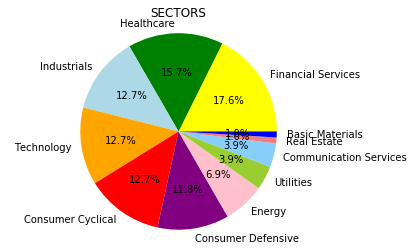

In [14]:
#sector breakdown pie chart

sector_list=['Financial Services','Healthcare','Industrials','Technology','Consumer Cyclical','Consumer Defensive','Energy','Utilities','Communication Services','Real Estate','Basic Materials']
sector_count=[18,16,13,13,13,12,7,4,4,1,1]
colors=["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"]

plt.pie(sector_count,labels=sector_list,colors=colors,autopct="%1.1f%%")
plt.axis('equal')
plt.title("SECTORS")
plt.show()

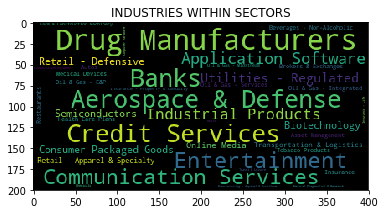

In [15]:
#industry breakdown wordcloud

industry_list=stock_df['industry'].value_counts()
#industry_list=stock_df['industry'].value_counts().index.tolist()
##print(industry_list)
industry_amount=np.array(industry_list)
#print(industry_amount)
#len(industry_amount)
wordcloud=WordCloud().generate_from_frequencies(industry_list)
plt.title("INDUSTRIES WITHIN SECTORS")
plt.imshow(wordcloud)


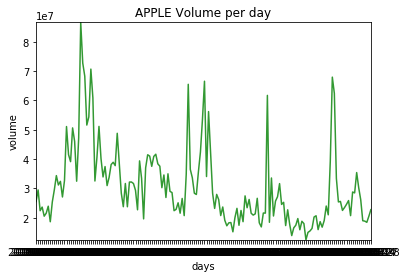

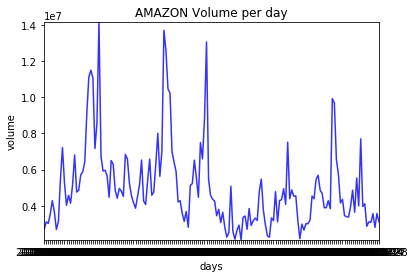

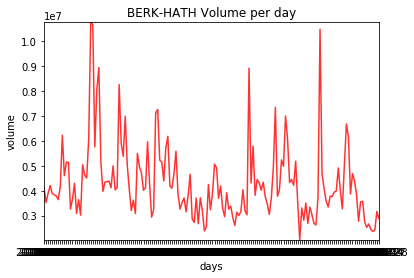

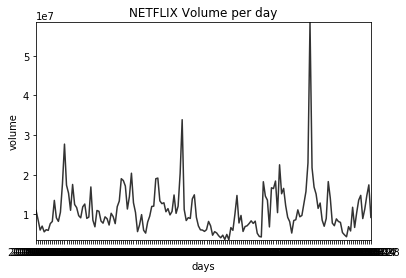

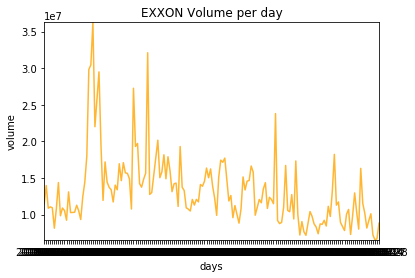

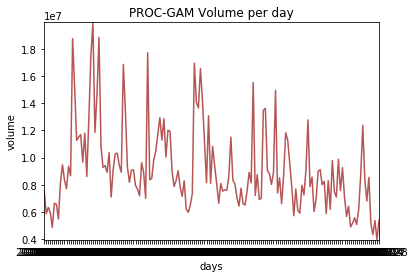

In [16]:

#look at the huge difference apple has on amount of volume
apple_opens=updated_df.loc[updated_df.ticker=='AAPL']['volume']
apple_days=updated_df.loc[updated_df.ticker=='AAPL']['date']
#print(apple_opens.values)
#apple_opens.max()
#apple_opens.min()

plt.plot(apple_days,apple_opens,alpha=.8,color='green')
plt.xlim(np.min(apple_days),np.max(apple_days))
plt.ylim(np.min(apple_opens),np.max(apple_opens))
plt.title("APPLE Volume per day")
plt.xlabel("days")
plt.ylabel("volume")

plt.show()

amazon_opens=updated_df.loc[updated_df.ticker=='AMZN']['volume']
amazon_days=updated_df.loc[updated_df.ticker=='AMZN']['date']
#print(apple_opens.values)
#amazon_opens.max()
#amazon_opens.min()

plt.plot(amazon_days,amazon_opens,alpha=.8,color='blue')
plt.xlim(np.min(amazon_days),np.max(amazon_days))
plt.ylim(np.min(amazon_opens),np.max(amazon_opens))
plt.title("AMAZON Volume per day")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

bh_opens=updated_df.loc[updated_df.ticker=='BRK.B']['volume']
bh_days=updated_df.loc[updated_df.ticker=='BRK.B']['date']
#print(apple_opens.values)
#amazon_opens.max()
#amazon_opens.min()

plt.plot(bh_days,bh_opens,alpha=.8,color='red')
plt.xlim(np.min(bh_days),np.max(bh_days))
plt.ylim(np.min(bh_opens),np.max(bh_opens))
plt.title("BERK-HATH Volume per day")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

n_opens=updated_df.loc[updated_df.ticker=='NFLX']['volume']
n_days=updated_df.loc[updated_df.ticker=='NFLX']['date']
#print(apple_opens.values)
#amazon_opens.max()
#amazon_opens.min()

plt.plot(n_days,n_opens,alpha=.8,color='black')
plt.xlim(np.min(n_days),np.max(n_days))
plt.ylim(np.min(n_opens),np.max(n_opens))
plt.title("NETFLIX Volume per day")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

x_opens=updated_df.loc[updated_df.ticker=='XOM']['volume']
x_days=updated_df.loc[updated_df.ticker=='XOM']['date']
#print(apple_opens.values)
#amazon_opens.max()
#amazon_opens.min()

plt.plot(x_days,x_opens,alpha=.8,color='orange')
plt.xlim(np.min(x_days),np.max(x_days))
plt.ylim(np.min(x_opens),np.max(x_opens))
plt.title("EXXON Volume per day")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

pg_opens=updated_df.loc[updated_df.ticker=='PG']['volume']
pg_days=updated_df.loc[updated_df.ticker=='PG']['date']
#print(apple_opens.values)
#amazon_opens.max()
#amazon_opens.min()


#looks at the spikes for proctor and gamble
plt.plot(pg_days,pg_opens,alpha=.8,color='brown')
plt.xlim(np.min(pg_days),np.max(pg_days))
plt.ylim(np.min(pg_opens),np.max(pg_opens))
plt.title("PROC-GAM Volume per day")
plt.xlabel("days")
plt.ylabel("volume")
plt.show()

In [17]:
apple_mean=updated_df.loc[updated_df.ticker=='AAPL']['volume'].sum()
apple_mean




5091036034

In [18]:
amazon_mean=updated_df.loc[updated_df.ticker=='AMZN']['volume'].sum()
amazon_mean

828250113

In [19]:
bh_mean=updated_df.loc[updated_df.ticker=='BRK.B']['volume'].sum()
bh_mean

715124901

In [20]:
n_mean=updated_df.loc[updated_df.ticker=='NFLX']['volume'].sum()
n_mean

1826148699

In [21]:
x_mean=updated_df.loc[updated_df.ticker=='XOM']['volume'].sum()
x_mean

2196991948

In [22]:
pg_mean=updated_df.loc[updated_df.ticker=='PG']['volume'].sum()
pg_mean

1518023864

Text(0,0.5,'BILLIONS')

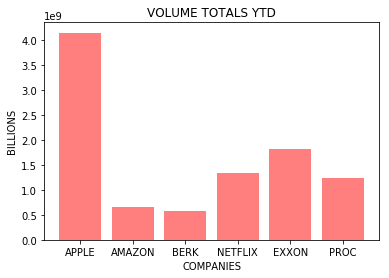

In [ ]:
users = [4147948227,657420985,567791986,1347983176,1820574631,1230699991]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["APPLE", "AMAZON", "BERK", "NETFLIX", "EXXON","PROC"])
plt.title("VOLUME TOTALS YTD")
plt.xlabel("COMPANIES")
plt.ylabel("BILLIONS")

In [ ]:

#tech and industrial sectors graphed by ave volume per day

csvfile=("tech.csv")
tech_df=pd.read_csv(csvfile)
tech_df

tvolume=tech_df.groupby(pd.Grouper(key='date'))
tvolume=tvolume['volume'].mean()
#print(tvolume)

dates=tvolume.index.tolist()
#print(dates)
plt.plot(dates,tvolume,color='blue')

csvfile=("IND.csv")
industry_df=pd.read_csv(csvfile)
industry_df

ivolume=industry_df.groupby(pd.Grouper(key='date'))
ivolume=ivolume['volume'].mean()
#print(tvolume)

dates=ivolume.index.tolist()
dates

plt.plot(dates,ivolume,color='red')
plt.title("tech and industrial sectors graphed by ave volume per day")

In [ ]:
#financial services and healthcare sectors graphed by ave volume per day

#fs_df.to_csv("FS.csv")
#hc_df.to_csv("HC.csv")

csvfile=("FS.csv")
fs_df=pd.read_csv(csvfile)
fs_df

fsvolume=fs_df.groupby(pd.Grouper(key='date'))
fsvolume=fsvolume['volume'].mean()
#print(fsvolume)

dates=fsvolume.index.tolist()
#dates

plt.plot(dates,fsvolume,color='green')

csvfile=("HC.csv")
hc_df=pd.read_csv(csvfile)
hc_df

hcvolume=hc_df.groupby(pd.Grouper(key='date'))
hcvolume=hcvolume['volume'].mean()
#print(fsvolume)

dates=hcvolume.index.tolist()
#dates

plt.plot(dates,hcvolume,color='purple')
plt.title("financial services and healthcare sectors graphed by ave volume per day")

In [ ]:
bh_pc=updated_df.loc[updated_df.ticker=='BRK.B']['percent_change']
plt.boxplot(bh_pc)
plt.title("percentchange")
plt.show()
bh_vol=updated_df.loc[updated_df.ticker=='BRK.B']['volume']
plt.title("volume moved")
plt.boxplot(bh_vol)

plt.show()

In [ ]:
a_pc=updated_df.loc[updated_df.ticker=='AAPL']['percent_change']
plt.boxplot(a_pc)
plt.title("percentchange")
plt.show()
a_vol=updated_df.loc[updated_df.ticker=='AAPL']['volume']
plt.boxplot(a_vol)
plt.title("volume moved")
plt.show()

In [ ]:

n_pc=updated_df.loc[updated_df.ticker=='NFLX']['percent_change']
plt.title("percentchange")
plt.title("volume moved")
plt.boxplot(n_pc)

In [ ]:
n_vol=updated_df.loc[updated_df.ticker=='NFLX']['volume']

plt.title("volume moved")
plt.boxplot(n_vol)

In [ ]:

tech_volume=tech_df['volume'].sum()
#tech_volume


industry_volume=industry_df['volume'].sum()
#industry_volume

fs_volume=fs_df['volume'].sum()
#fs_volume

hc_volume=hc_df['volume'].sum()
#hc_volume

csvfile="energy.csv"
energy_df=pd.read_csv(csvfile)
energy_volume=energy_df['volume'].sum()
#energy_volume

csvfile="CC.csv"
cc_df=pd.read_csv(csvfile)
cc_volume=cc_df['volume'].sum()
#cc_volume

csvfile="CD.csv"
cd_df=pd.read_csv(csvfile)
cd_volume=cd_df['volume'].sum()
#cd_volume



In [ ]:
users = [tech_volume,industry_volume,fs_volume,hc_volume,energy_volume,cc_volume,cd_volume]
x_axis = np.arange(len(users))
plt.bar(x_axis, users, color='blue', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["TECH 13", "INDUSTRIALS 13", "FINANCIAL SERVICES 18", "HEALTH CARE 16", "ENERGY 7","CONSUMER CYCLICAL 13","CONSUMER DEFENSIVE 12"],rotation=90)
plt.title("VOLUME TOTALS YTD")
plt.xlabel("SECTORS")
plt.ylabel("BILLIONS")

